# **Data Preprocessing** ✈



In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df=pd.read_csv('/content/hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
# Speculations of non-null values . children,country,agent,company < likely to have missing values : 119386,  118902, 103050 and 6797 consecutively. Whereas the majority values is at 119390
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Describing datasets with it's min, max, mean, median and standard deviation values
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
# Assess the variable with missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
most_missing_variable = missing_values.idxmax()
most_missing_values = missing_values.max()
print(missing_values)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
# Displaying the number of unique values in each categories
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type                        4
adr                               8879
required_car_parking_spaces          5
total_of_special_requests            6
reservation_status                   3
reservation_status_date            926
dtype: int64

In [ ]:
# Displaying the number of rows that contains children with Null/Na values
nan_children_rows = df[df['children'].isna()]
print(nan_children_rows)

            hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel            1          2               2015   
40667  City Hotel            1          1               2015   
40679  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40600                        1                     0       2  ...   
40667                        0                     2       2  ...   
40679                        0                     2       3  ... 

In [ ]:
# Replacing NA values of Children to 0, vwhereby NA/Null could indicate that they do not have any childrens
df['children'] = df['children'].fillna(0)
print(df['children'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64


In [ ]:
# Detecting which country has (Null) values
# Note that removing (Null) values affects the total number of rows as it will delete the necessary rows
nan_country_rows = df[df['country'].isna()]
print(nan_country_rows)


               hotel  is_canceled  lead_time  arrival_date_year  \
30      Resort Hotel            0        118               2015   
4127    Resort Hotel            1          0               2016   
7092    Resort Hotel            1          8               2016   
7860    Resort Hotel            1         39               2016   
8779    Resort Hotel            1          0               2016   
...              ...          ...        ...                ...   
65908     City Hotel            1          0               2017   
65909     City Hotel            1          0               2017   
65910     City Hotel            1          0               2017   
80830     City Hotel            0          4               2015   
101488    City Hotel            0          1               2016   

       arrival_date_month  arrival_date_week_number  \
30                   July                        27   
4127             February                         8   
7092                 July     

In [ ]:
# Datasets with removed Country with Null Values
df_cleaned= df.dropna(subset=['country'])

In [ ]:
# Crosschecking "agent" variable. 16006 null values + 102896 = 118902 (Sum)
# Note that "Agent" variable with Null Values does not have to be removed
# Null indicates the sources of hotel bookings does not come from agent. Eg , 304, 240 < agent ID
# Hence, Values Justified correctly
df_cleaned[df_cleaned['agent'].isna()]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
6       Resort Hotel            0          0               2015   
18      Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119124    City Hotel            0          0               2017   
119151    City Hotel            0          0               2017   
119166    City Hotel            0          0               2017   
119215    City Hotel            0          2               2017   
119248    City Hotel            0         22               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
6                    July                        27   
18                   July                        27   
...                   ...                       ...   
119124             August                        35   
119151             August                        35   
119166             August                        35   
119215             August                        35   
119248             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
6                               1                        0   
18                              1                        0   
...                           ...                      ...   
119124                         29                        0   
119151                         29                        0   
119166                         30                        0   
119215                         31                        0   
119248                         29                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
6                          2       2  ...    No Deposit    NaN     NaN   
18                         1       2  ...    No Deposit    NaN   110.0   
...                      ...     ...  ...           ...    ...     ...   
119124                     1       1  ...    No Deposit    NaN    72.0   
119151                     1       2  ...    No Deposit    NaN     NaN   
119166                     1       1  ...    No Deposit    NaN     NaN   
119215                     1       1  ...    No Deposit    NaN     NaN   
119248                     3       1  ...    No Deposit    NaN   485.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
6                         0     Transient  107.00   
18                        0     Transient  107.42   
...                     ...           ...     ...   
119124                    0     Transient    0.00   
119151                    0     Transient  270.00   
119166                    0     Transient  140.00   
119215                    0     Transient  140.00   
119248                    0     Transient   75.00   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
6             

In [ ]:
# Same goes to "Company" 112279 (Null Values) + 6623 (Company Id) = 118902
# Hence, Values Justified correctly
df_cleaned[df_cleaned['company'].isna()]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [ ]:
# Dropping / Removing undefined values from distribution channel and market segment
df_cleaned = df_cleaned[(df_cleaned['distribution_channel'] != 'Undefined') & (df_cleaned['market_segment'] != 'Undefined')]

In [ ]:
# Replacing Undefined values to SC (Since they're both the same)
df_cleaned['meal'] = df_cleaned['meal'].replace('Undefined', 'SC')

<ipython-input-14-05a5dcafc267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['meal'] = df_cleaned['meal'].replace('Undefined', 'SC')


In [ ]:
# Replacing values from na to 0, whereby 0 means they could either bought the bookings by themselves or company/agent vice versa
df_cleaned[['agent','company']] = df_cleaned[['agent','company']].fillna('0')
print(df_cleaned[['agent','company']])

        agent company
0           0       0
1           0       0
2           0       0
3       304.0       0
4       240.0       0
...       ...     ...
119385  394.0       0
119386    9.0       0
119387    9.0       0
119388   89.0       0
119389    9.0       0

[118897 rows x 2 columns]


<ipython-input-15-e6f42f47aecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['agent','company']] = df_cleaned[['agent','company']].fillna('0')


##**Performing Outlier Tests**

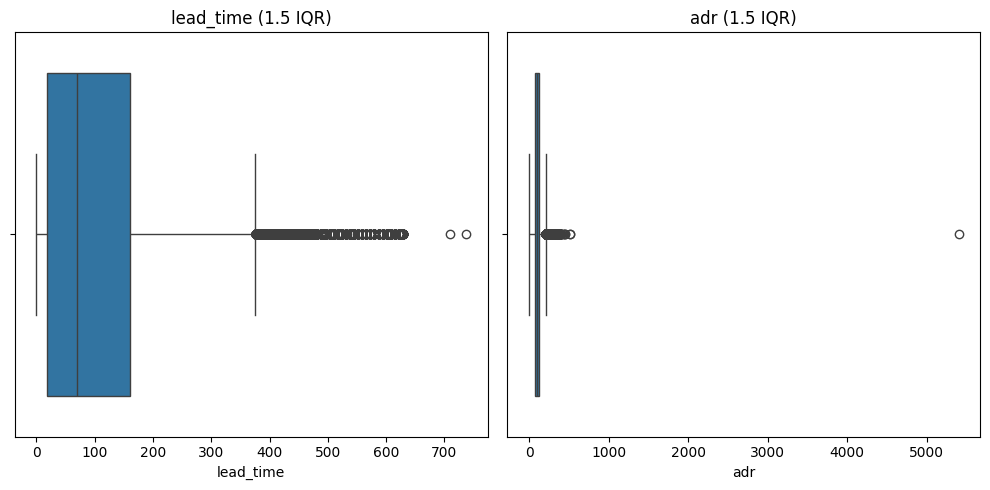

In [ ]:
def plot_boxplots(df_cleaned):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  # Boxplot for 'lead_time' & 'adr'
  sns.boxplot(x=df_cleaned['lead_time'], ax=axes[0])
  axes[0].set_title('lead_time (1.5 IQR)')

  sns.boxplot(x=df_cleaned['adr'], ax=axes[1])
  axes[1].set_title('adr (1.5 IQR)')

  # Adjust layout
  plt.tight_layout()
  plt.show()
plot_boxplots(df_cleaned)

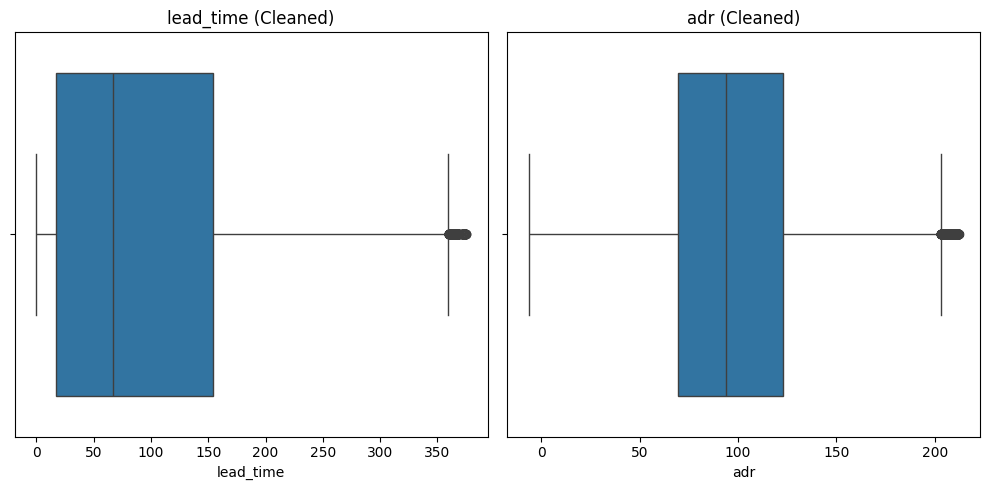

In [ ]:
# IQR method in removing outliers USING 1.5 THRESHOLD
def remove_outliers_iqr(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

columns_to_check = ['lead_time','adr']
df_cleaned = df_cleaned.copy()

for column in columns_to_check:
    df_cleaned = remove_outliers_iqr(df_cleaned, column)

def display_boxplot1(df_cleaned):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

  sns.boxplot(x=df_cleaned['lead_time'], ax=axes[0])
  axes[0].set_title('lead_time (Cleaned)')

  sns.boxplot(x=df_cleaned['adr'], ax=axes[1])
  axes[1].set_title('adr (Cleaned)')

  plt.tight_layout()
  plt.show()

display_boxplot1(df_cleaned)

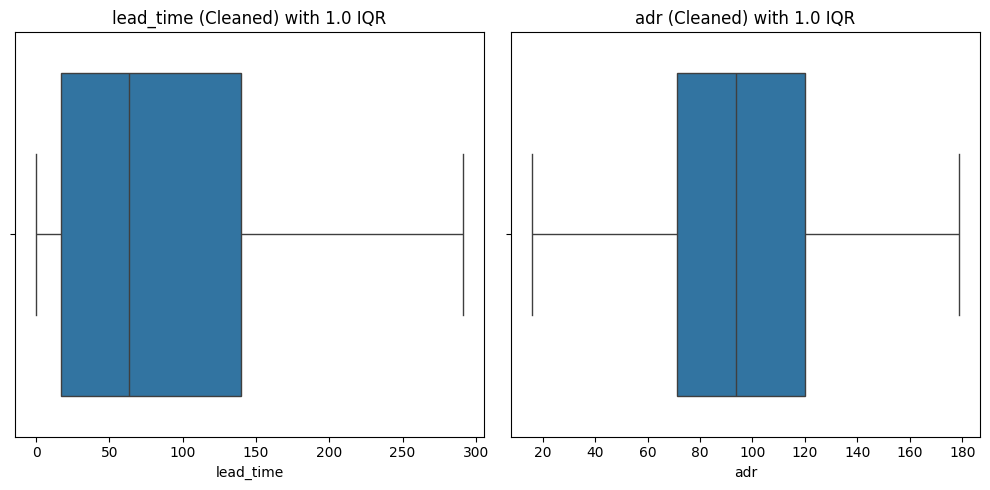

In [ ]:
# IQR method in removing outliers using -1 and +1 threshhold, to remove the entire outliers
def remove_outliers_iqr(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

columns_to_check = ['lead_time','adr']
df_cleaned2 = df_cleaned.copy()

for column in columns_to_check:
    df_cleaned2 = remove_outliers_iqr(df_cleaned2, column)

def display_boxplot2(df_cleaned2):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

  sns.boxplot(x=df_cleaned2['lead_time'], ax=axes[0])
  axes[0].set_title('lead_time (Cleaned) with 1.0 IQR')

  sns.boxplot(x=df_cleaned2['adr'], ax=axes[1])
  axes[1].set_title('adr (Cleaned) with 1.0 IQR')

  plt.tight_layout()
  plt.show()

display_boxplot2(df_cleaned2)

##Removing seen outliers from datasets Child and Babies

In [ ]:
# Combine conditions for babies and children outliers
outliers_combined = df_cleaned2[(df_cleaned2['babies'] > 2) | (df_cleaned2['children'] > 3)]

# Display rows with outliers for manual inspection
print(outliers_combined)

              hotel  is_canceled  lead_time  arrival_date_year  \
328    Resort Hotel            1         55               2015   
46619    City Hotel            0         37               2016   
78656    City Hotel            0         11               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
328                 July                        29                         12   
46619            January                         3                         12   
78656            October                        42                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
328                          4                    10       2  ...   
46619                        0                     2       2  ...   
78656                        2                     1       1  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
328      No Deposit    8.0       0                    0  

In [ ]:
# Removing outliers for babies that has more than 2, and children that has more than 3
df_cleaned2 = df_cleaned2[(df_cleaned2['babies'] <= 2) & (df_cleaned2['children'] <= 3)]

#**Exploratory Data Analysis (EDA) 🔍**

##**Barcharts (Categorical Variables)**


Bar Chart for hotel:



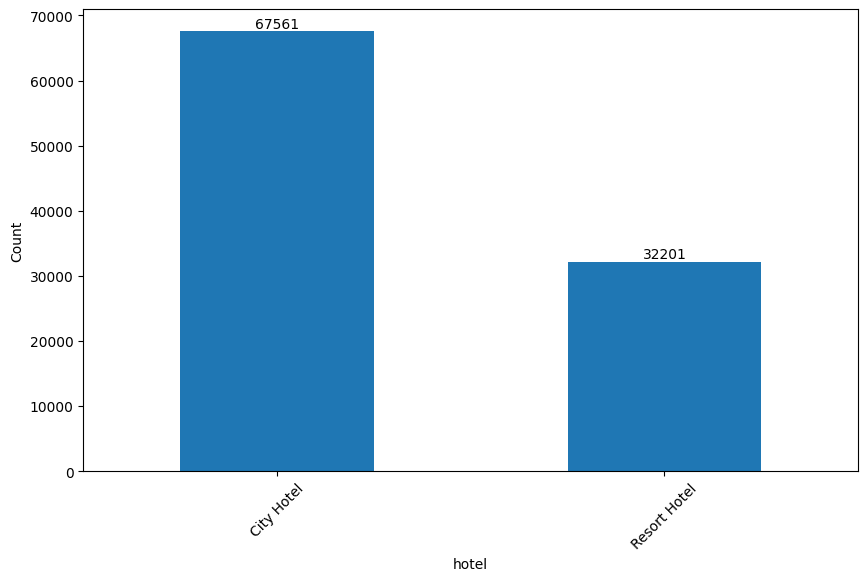


Bar Chart for arrival_date_month:



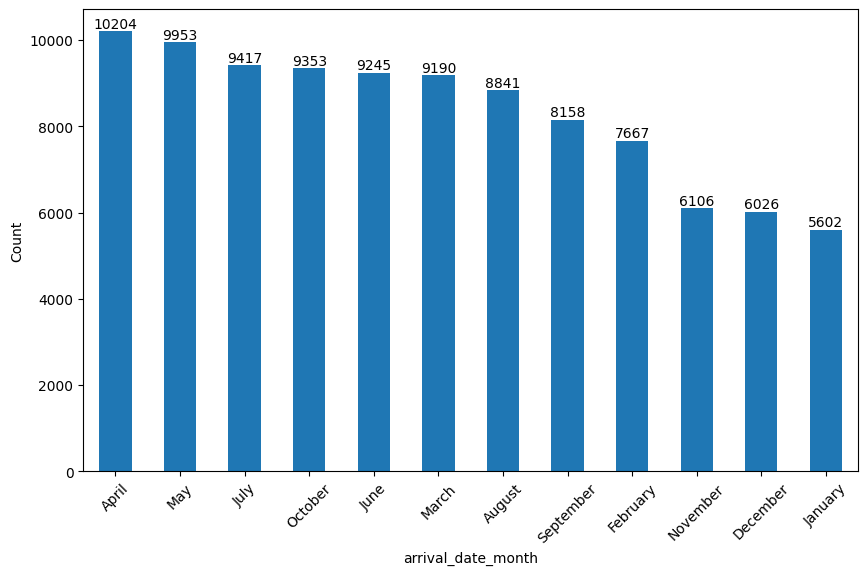


Bar Chart for meal:



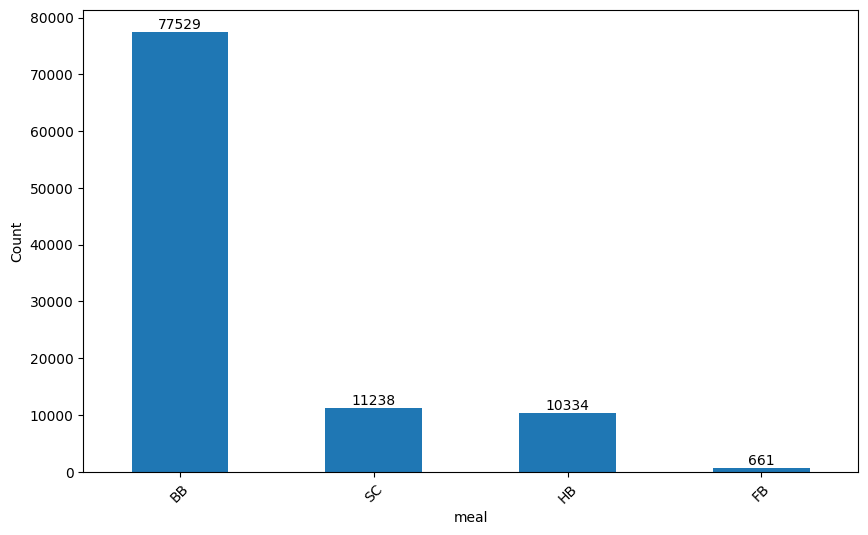


Bar Chart for market_segment:



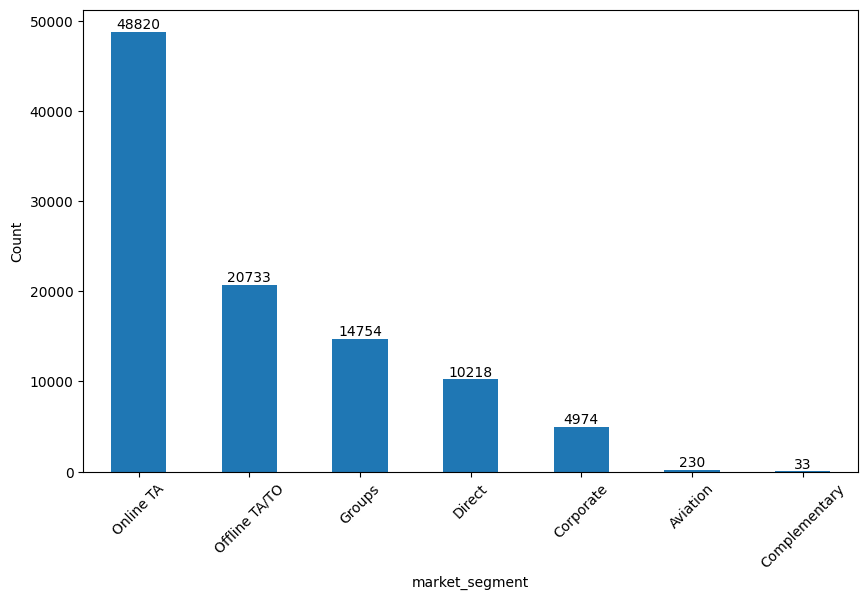


Bar Chart for distribution_channel:



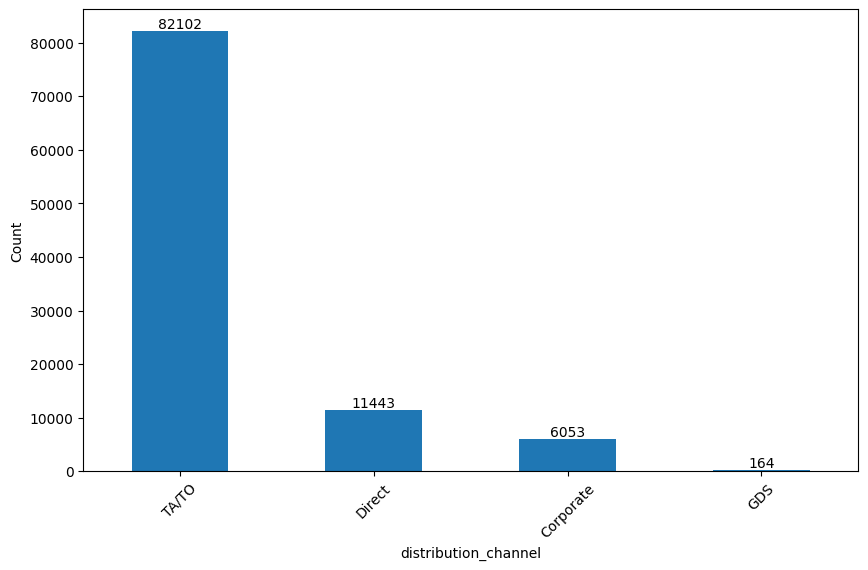


Bar Chart for reserved_room_type:



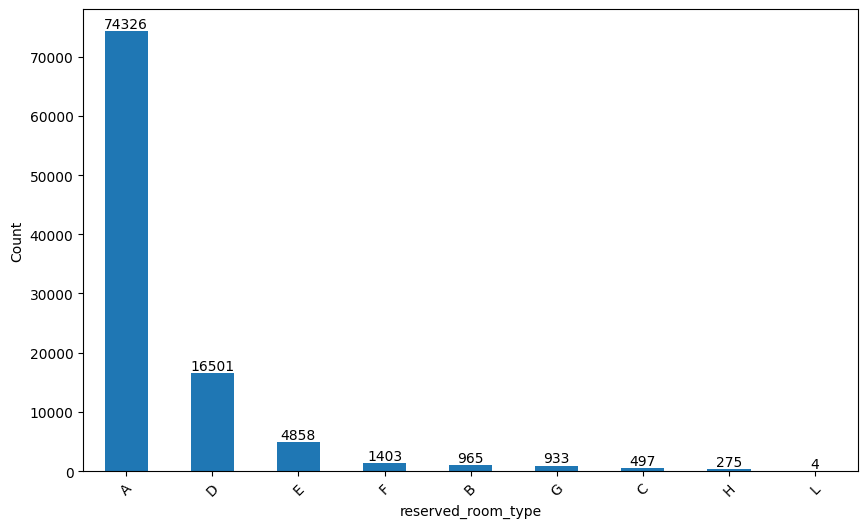


Bar Chart for assigned_room_type:



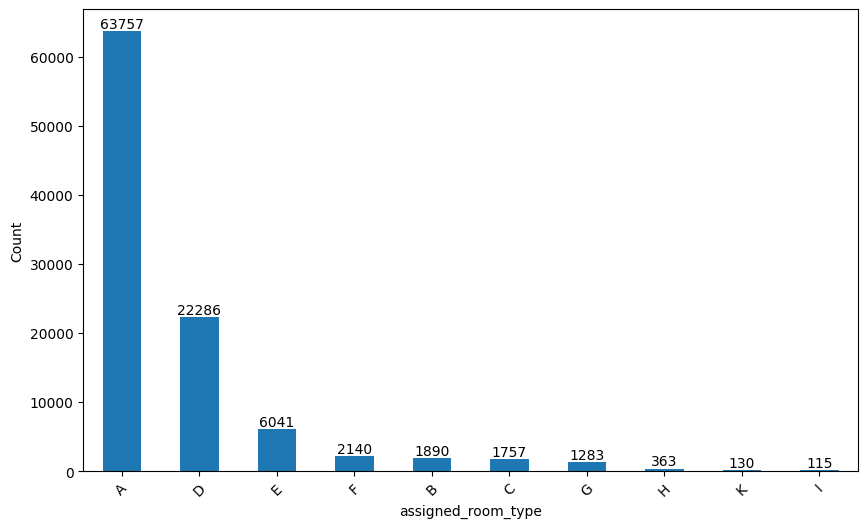


Bar Chart for deposit_type:



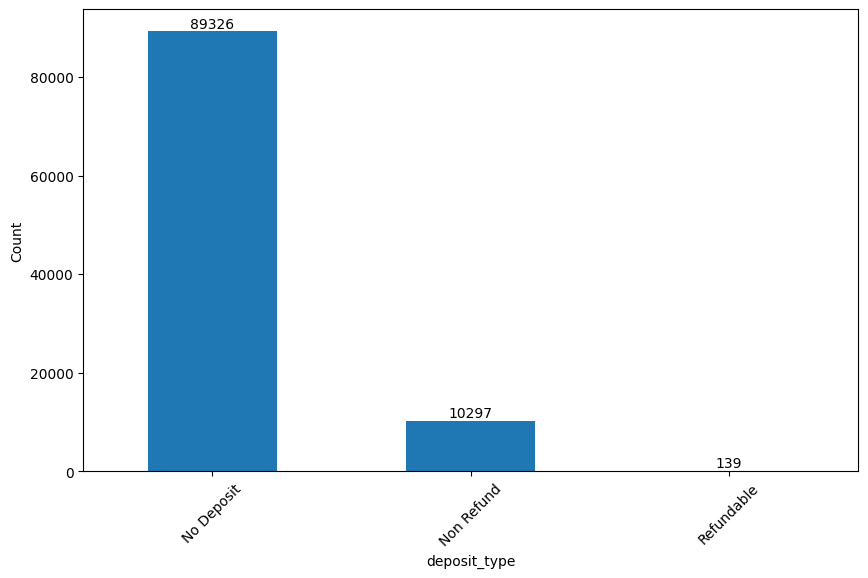


Bar Chart for customer_type:



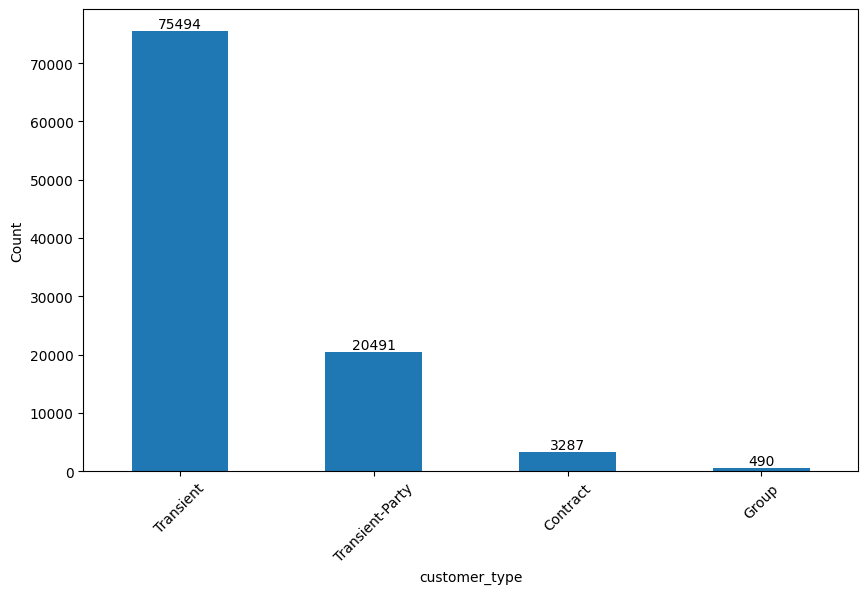


Bar Chart for reservation_status:



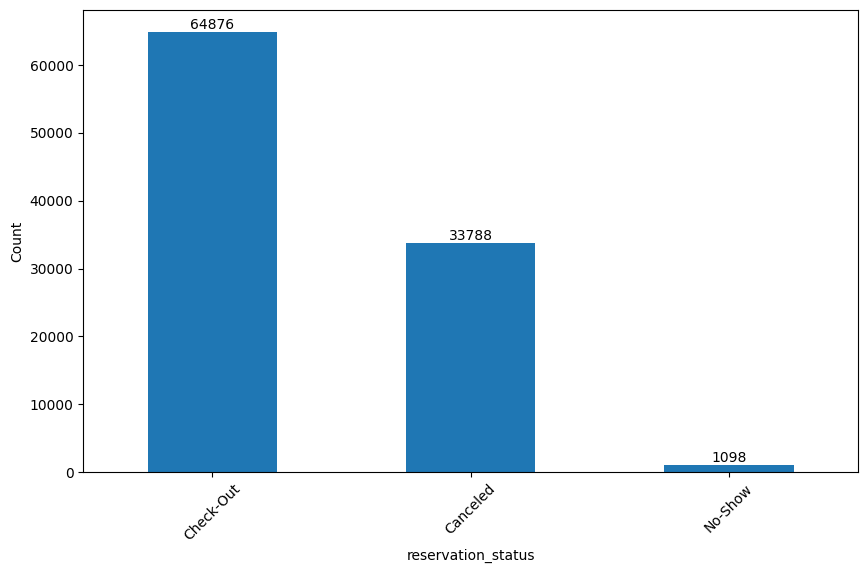

In [ ]:
def categorical_columns():
  # Defining the categorical columns
  categorical_columns = ["hotel", "arrival_date_month", "meal", "market_segment",
                        "distribution_channel", "reserved_room_type", "assigned_room_type",
                        "deposit_type", "customer_type", "reservation_status"]

  # Loop through each categorical column and plot a bar chart
  for column in categorical_columns:
      # Print a title before the bar chart
      print(f"\nBar Chart for {column}:\n")

      plt.figure(figsize=(10, 6))

      # Get the value counts for the column
      value_counts = df_cleaned2[column].value_counts()

      # Plot the bar chart
      ax = value_counts.plot(kind='bar')

      # Add labels and title
      plt.xlabel(column)
      plt.ylabel('Count')

      # Add counts on top of the bars
      for i, count in enumerate(value_counts):
          ax.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10)  # Positioning and styling text

      # Display the plot
      plt.xticks(rotation=45)  # Rotate x labels for better readability
      plt.show()

categorical_columns()


Bar Chart for Top 10 country:



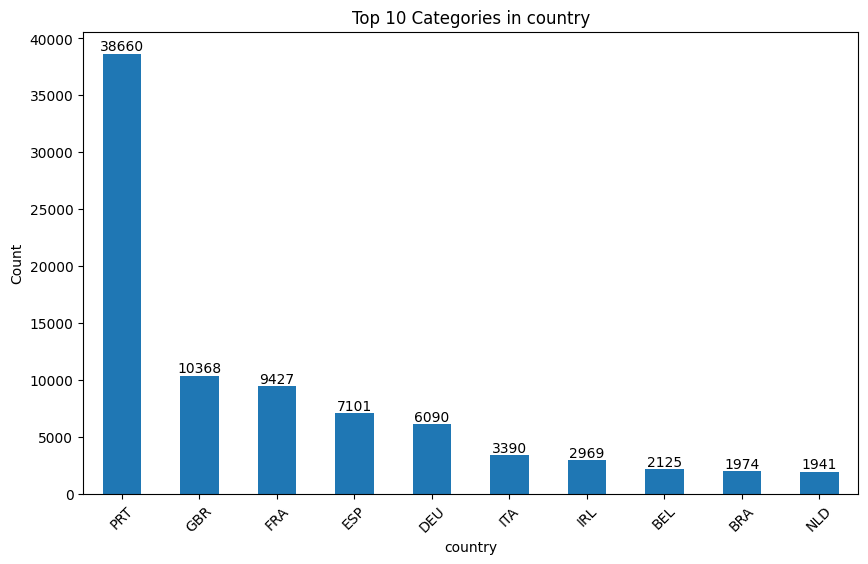


Bar Chart for Top 10 agent:



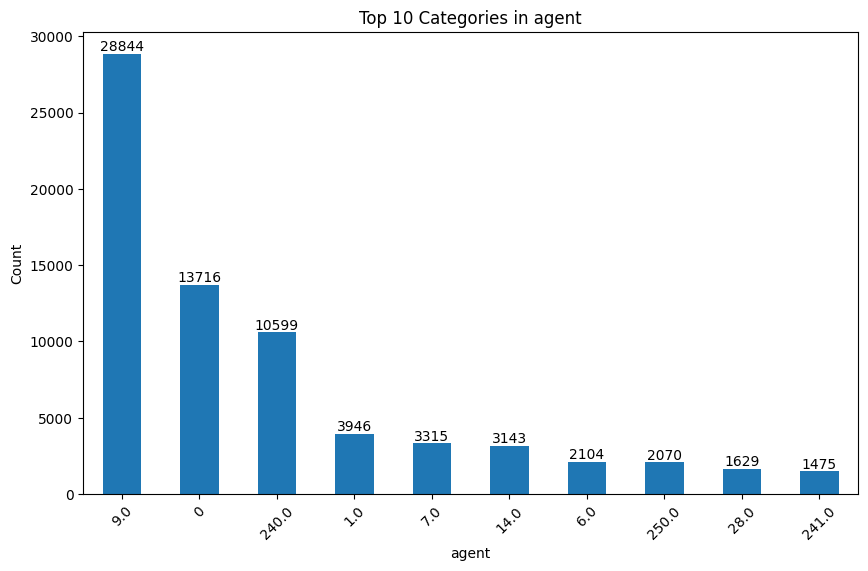


Bar Chart for Top 10 company:



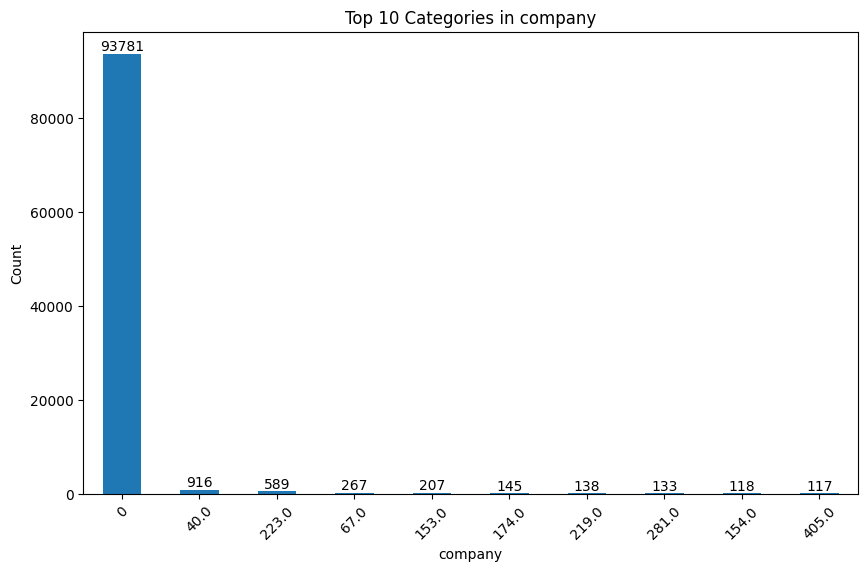


Bar Chart for Top 10 reservation_status_date:



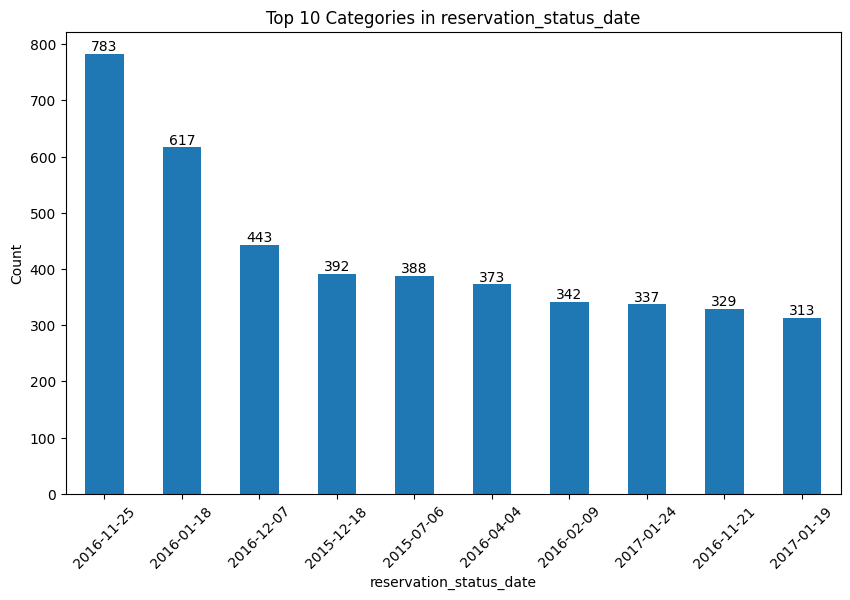

In [ ]:
def plot_top_n_categories(df_cleaned2, columns, top_n=10):
    for column in ["country", "agent", "company", "reservation_status_date"]:
        print(f"\nBar Chart for Top {top_n} {column}:\n")

        plt.figure(figsize=(10, 6))

        # Get the top N categories
        value_counts = df_cleaned2[column].value_counts().nlargest(top_n)

        # Plot the bar chart
        ax = value_counts.plot(kind='bar')

        # Add labels and title
        plt.title(f'Top {top_n} Categories in {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add counts on top of the bars
        for i, count in enumerate(value_counts):
            ax.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10)

        # Display the plot
        plt.xticks(rotation=45)
        plt.show()
plot_top_n_categories(df_cleaned2, ["country", "agent", "company", "reservation_status_date"])

##**Histogram (Numerical Variables)**

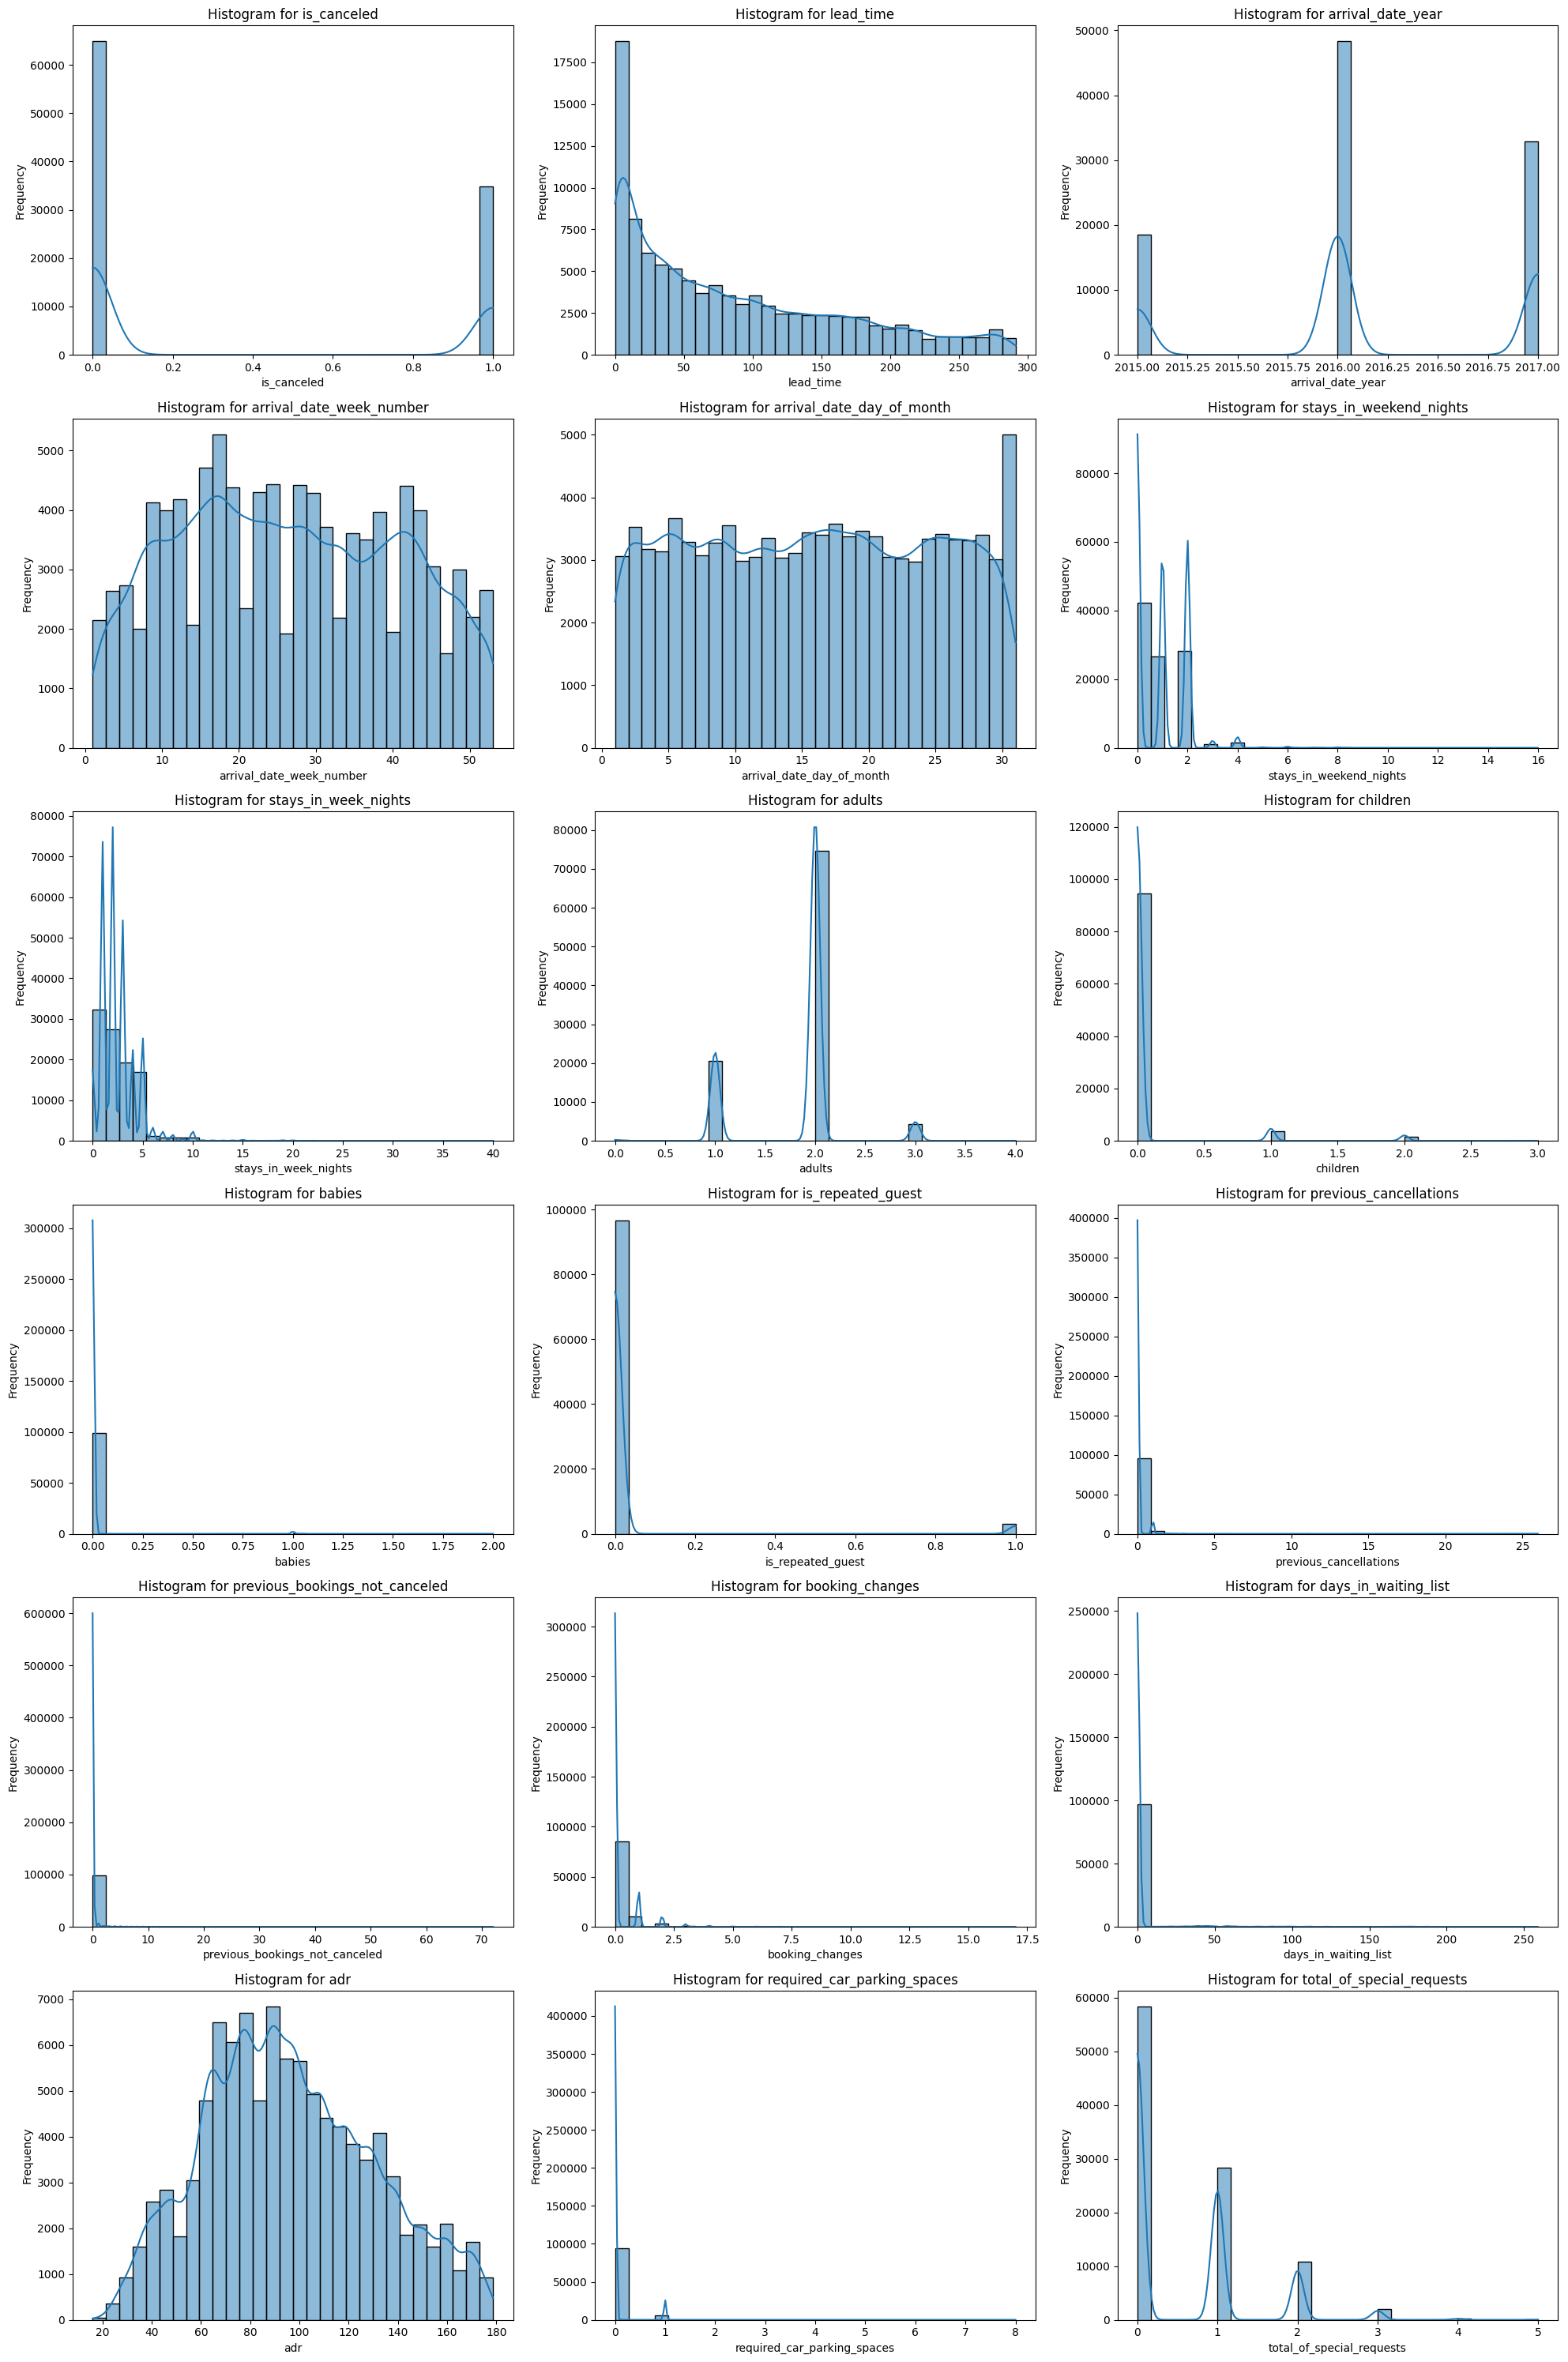

In [ ]:
def plot_numerical_histograms(df_cleaned2, n_cols=3):
    # List of numerical columns (you can modify this based on your dataset)
    numerical_columns = df_cleaned2.select_dtypes(include=['float64', 'int64']).columns

    # Determine the number of rows and columns for subplots
    n_cols = 3  # Number of columns you want in the subplot grid
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the required number of rows

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjust figsize to fit all plots

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Loop through each numerical column and plot a histogram in the respective subplot
    for i, column in enumerate(numerical_columns):
        sns.histplot(df_cleaned2[column], bins=30, kde=True, ax=axes[i])

        # Set title and labels
        axes[i].set_title(f'Histogram for {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    # Remove any empty subplots if there are fewer columns than subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout
    plt.tight_layout()

    # Display the combined plot
    plt.show()
plot_numerical_histograms(df_cleaned2)

##**Correlation Heatmap Matrix**

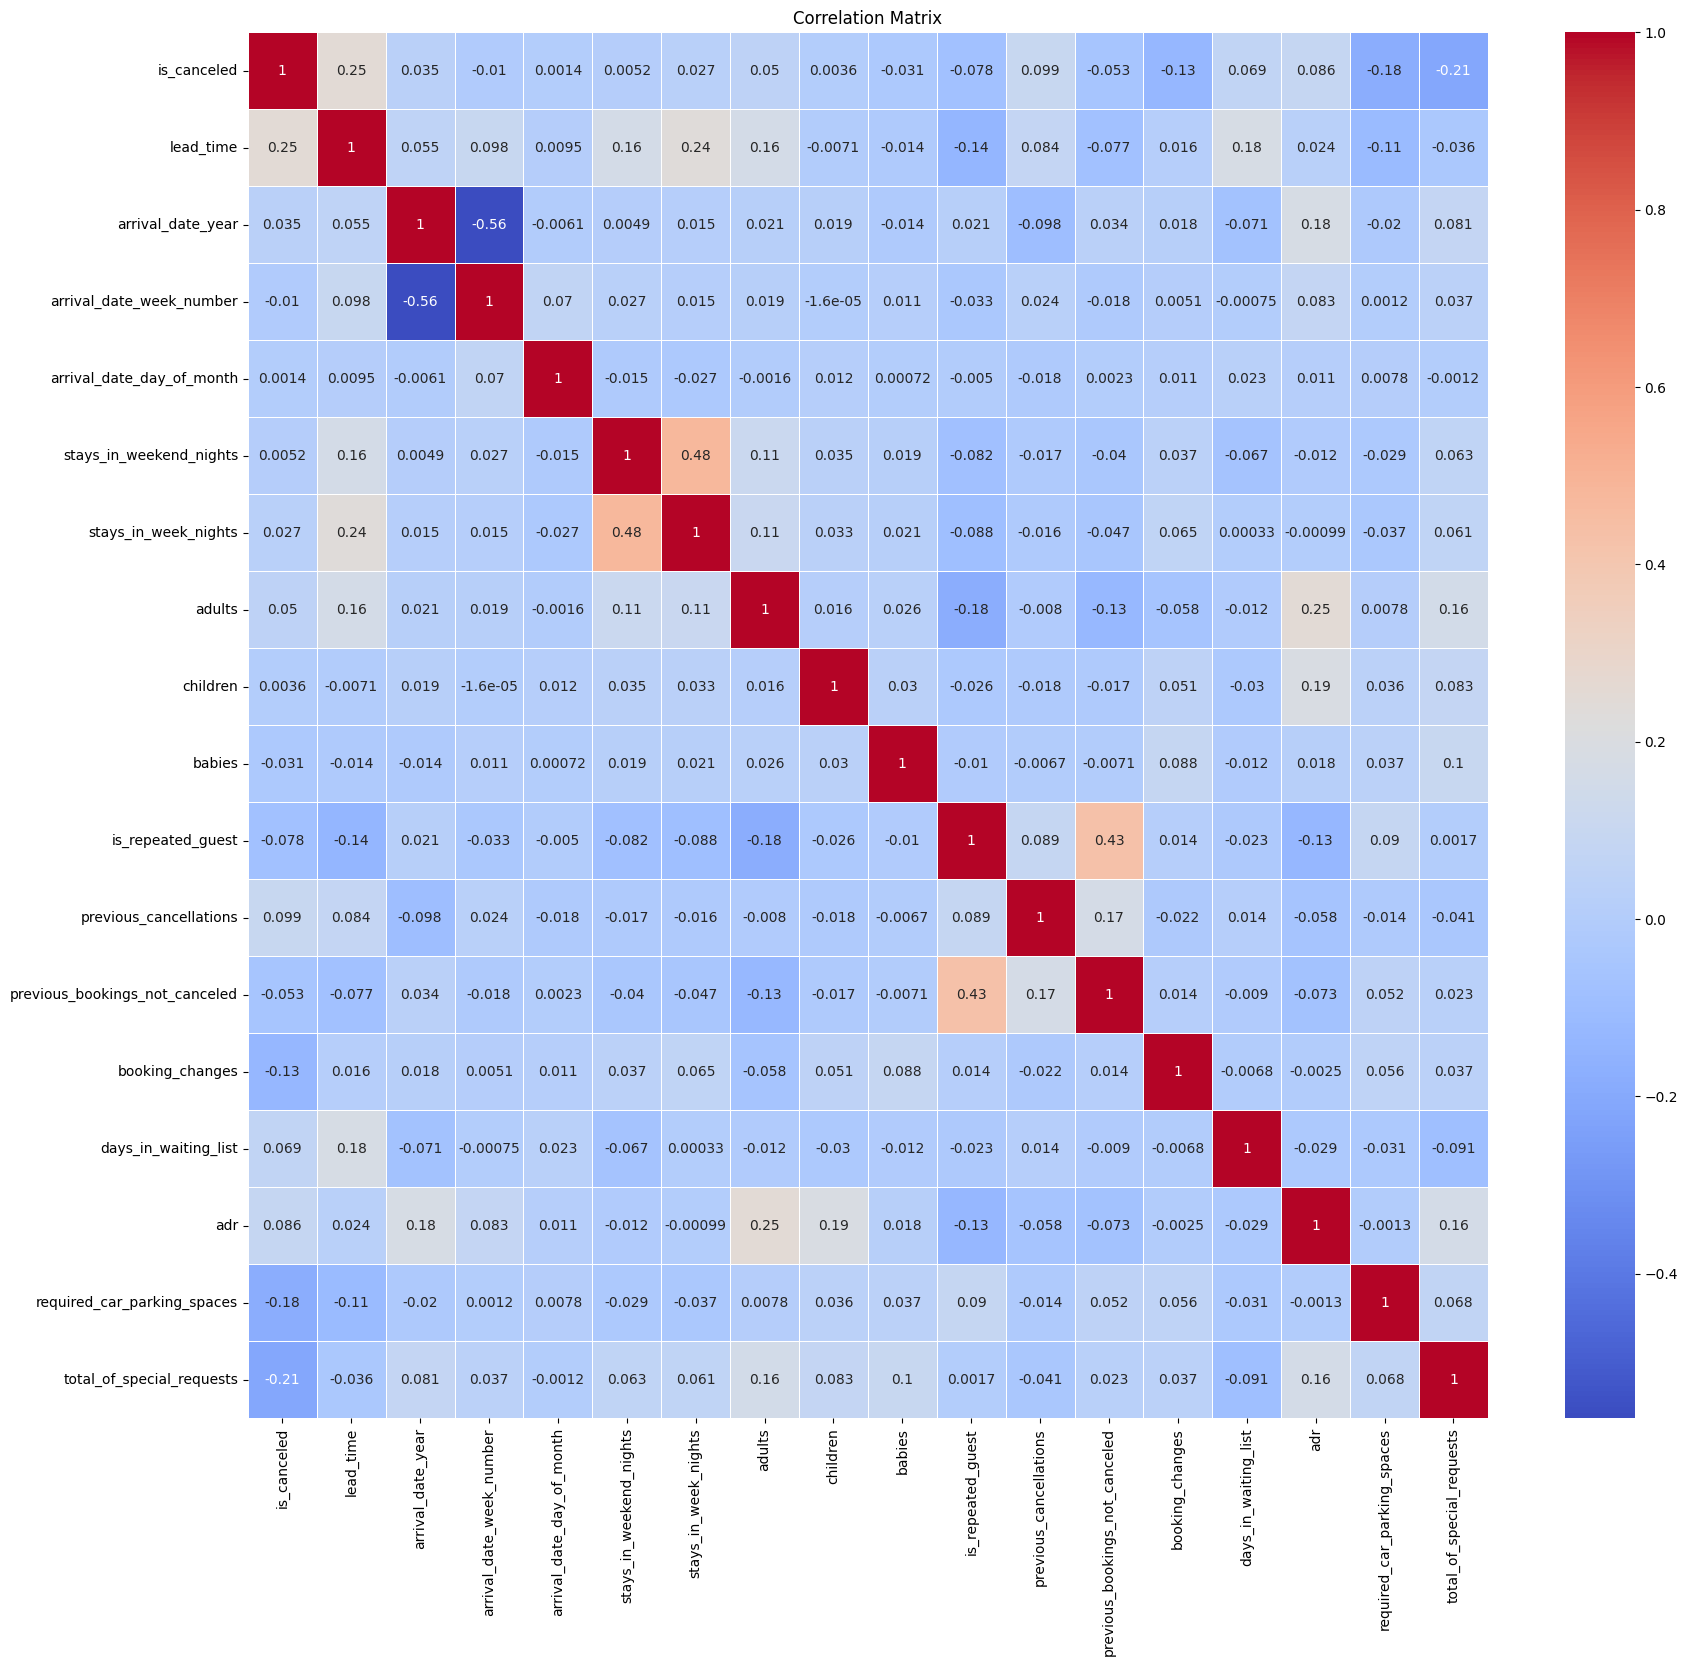

In [ ]:
def plot_correlation_heatmap(df_cleaned2):
  # Select only the numerical columns for correlation
  numerical_columns = df_cleaned2.select_dtypes(include=['float64', 'int64'])

  # Calculate the correlation matrix
  correlation_matrix = numerical_columns.corr()

  # Plot the heatmap using seaborn
  plt.figure(figsize=(20, 18))  # Adjust the size of the heatmap
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

  # Add title
  plt.title('Correlation Matrix')

  # Display the heatmap
  plt.show()

plot_correlation_heatmap(df_cleaned2)

# **Business Problem Visualizations 📊**

## Business Analysis 1

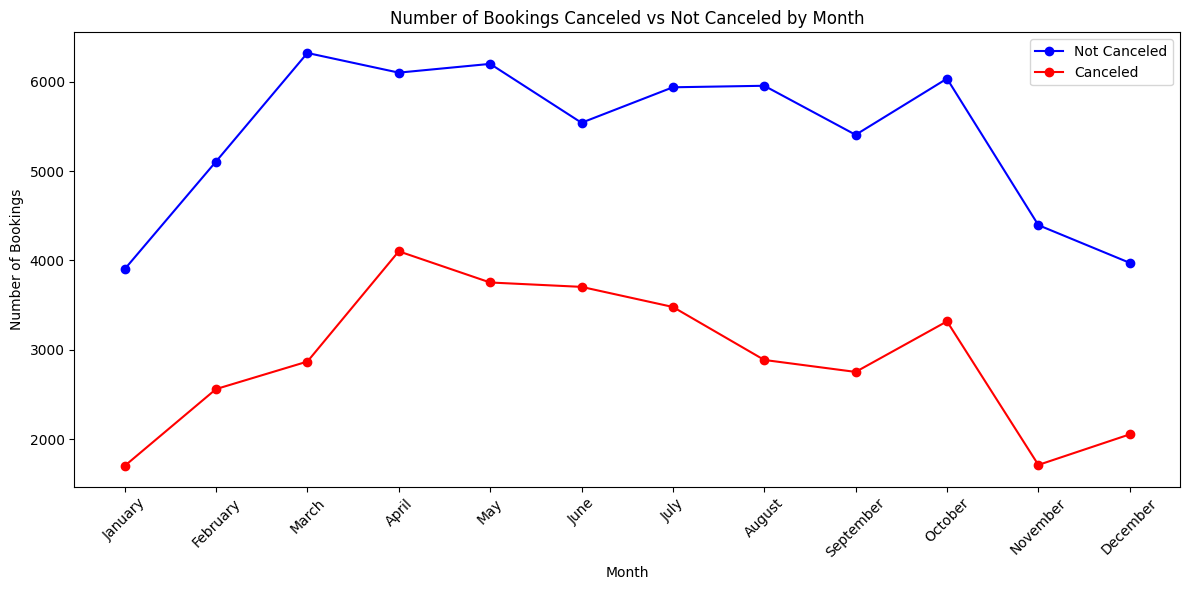

In [ ]:
def number_of_bookings_canceled_vs_not_canceled_by_month():

  monthly_bookings = df_cleaned2.groupby(['arrival_date_month', 'is_canceled']).size().unstack()

  # Ensure the months are in chronological order
  month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
  monthly_bookings = monthly_bookings.reindex(month_order)

  # Plot the data
  plt.figure(figsize=(12, 6))

  # Plotting the number of bookings for not canceled (is_canceled = 0) and canceled (is_canceled = 1)
  plt.plot(monthly_bookings.index, monthly_bookings[0], marker='o', label='Not Canceled', color='blue')
  plt.plot(monthly_bookings.index, monthly_bookings[1], marker='o', label='Canceled', color='red')

  # Add labels and title
  plt.title('Number of Bookings Canceled vs Not Canceled by Month')
  plt.xlabel('Month')
  plt.ylabel('Number of Bookings')
  plt.xticks(rotation=45)
  plt.legend()

  # Show the plot
  plt.tight_layout()
  plt.show()

number_of_bookings_canceled_vs_not_canceled_by_month()

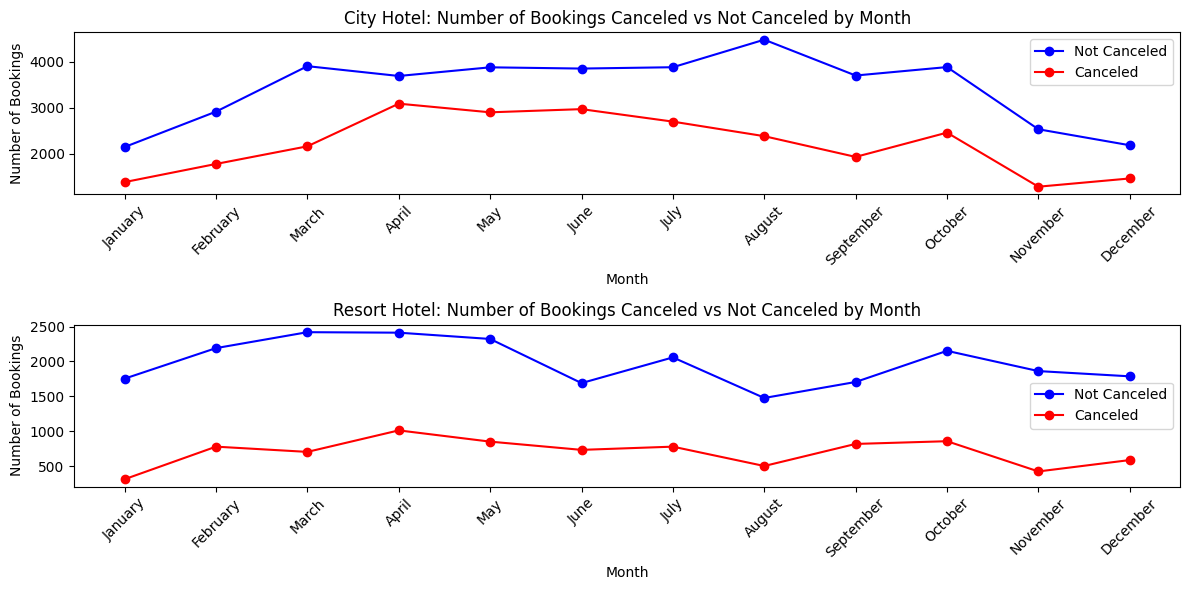

<Figure size 640x480 with 0 Axes>

In [ ]:
def City_and_Resort_hotel_number_of_bookings_canceled_vs_not_canceled_by_month():
  monthly_bookings_by_hotel = df_cleaned2.groupby(['hotel', 'arrival_date_month', 'is_canceled']).size().unstack()

  month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
  monthly_bookings_by_hotel = monthly_bookings_by_hotel.reindex(month_order, level=1)

  # Plotting graph
  plt.figure(figsize=(12, 6))

  plt.subplot(2, 1, 1)  # Two rows, one column, plot 1
  plt.plot(monthly_bookings_by_hotel.loc['City Hotel'].index,
          monthly_bookings_by_hotel.loc['City Hotel'][0], marker='o', label='Not Canceled', color='blue')
  plt.plot(monthly_bookings_by_hotel.loc['City Hotel'].index,
          monthly_bookings_by_hotel.loc['City Hotel'][1], marker='o', label='Canceled', color='red')
  plt.title('City Hotel: Number of Bookings Canceled vs Not Canceled by Month')
  plt.xlabel('Month')
  plt.ylabel('Number of Bookings')
  plt.xticks(rotation=45)
  plt.legend()

  # Plot for Resort Hotel
  plt.subplot(2, 1, 2)  # Two rows, one column, plot 2
  plt.plot(monthly_bookings_by_hotel.loc['Resort Hotel'].index,
          monthly_bookings_by_hotel.loc['Resort Hotel'][0], marker='o', label='Not Canceled', color='blue')
  plt.plot(monthly_bookings_by_hotel.loc['Resort Hotel'].index,
          monthly_bookings_by_hotel.loc['Resort Hotel'][1], marker='o', label='Canceled', color='red')
  plt.title('Resort Hotel: Number of Bookings Canceled vs Not Canceled by Month')
  plt.xlabel('Month')
  plt.ylabel('Number of Bookings')
  plt.xticks(rotation=45)
  plt.legend()

  # Adjust the layout and display the plot
  plt.tight_layout()
  plt.show()

  # Adjust the layout and display the plot
  plt.tight_layout()
  plt.show()

City_and_Resort_hotel_number_of_bookings_canceled_vs_not_canceled_by_month()

## Business Analysis 2

In [ ]:
def GeographicalBookingAreas():
    # Group by country and calculate number of bookings, canceled, and non-canceled bookings
    country_bookings = df_cleaned2.groupby('country').agg(
        num_bookings=('country', 'size'),
        num_canceled=('is_canceled', lambda x: (x == 1).sum()),
        num_non_canceled=('is_canceled', lambda x: (x == 0).sum())
    ).reset_index()

    # Select the top 10 countries by number of bookings
    top_10_countries = country_bookings.nlargest(10, 'num_bookings')

    # Insert your Mapbox access token
    mapbox_access_token = 'your_mapbox_token_here'

    # Import the plotly.express module
    !pip install plotly.express
    import plotly.express as px

    # Create a choropleth map for the top 10 countries by number of bookings
    fig = px.choropleth(top_10_countries,
                        locations="country",
                        locationmode="ISO-3",
                        color="num_bookings",
                        hover_name="country",
                        hover_data={
                            'num_bookings': True,
                            'num_canceled': True,
                            'num_non_canceled': True
                        },
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="Top 10 Countries by Number of Hotel Bookings")

    # Update the layout to use Mapbox
    fig.update_layout(
        mapbox_style="light",
        mapbox_accesstoken=mapbox_access_token,
        mapbox_zoom=1,
        mapbox_center={"lat": 10, "lon": 0}
    )

    # Show the map
    fig.show()

    # Display additional information
    print(top_10_countries[['country', 'num_bookings', 'num_canceled', 'num_non_canceled']])

GeographicalBookingAreas()

    country  num_bookings  num_canceled  num_non_canceled
130     PRT         38660         20903             17757
55      GBR         10368          2064              8304
53      FRA          9427          1700              7727
49      ESP          7101          1647              5454
42      DEU          6090          1083              5007
77      ITA          3390          1191              2199
72      IRL          2969           663              2306
14      BEL          2125           415              1710
24      BRA          1974           708              1266
118     NLD          1941           345              1596


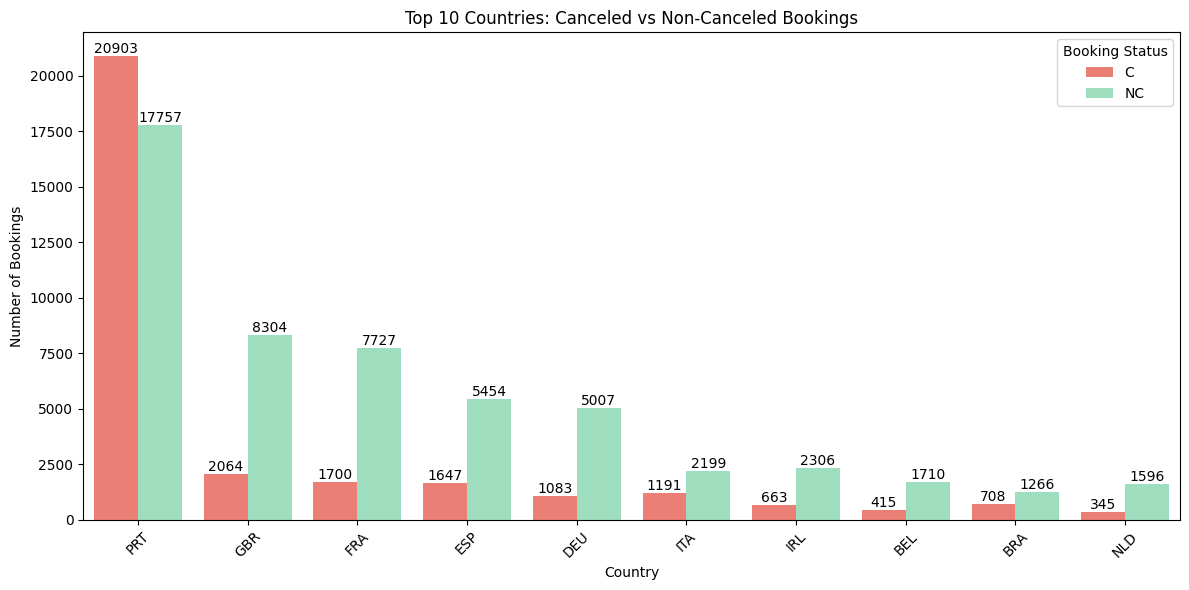

In [ ]:
def top10countries_canceled_vs_non_canceled():
  warnings.simplefilter(action='ignore', category=FutureWarning)
  # Group by country and cancellation status
  country_status = df_cleaned2.groupby(['country', 'is_canceled']).size().unstack(fill_value=0).reset_index()

  # Rename columns for clarity (C for Canceled, NC for Not Canceled)
  country_status.columns = ['country', 'NC', 'C']

  # Calculate total bookings for each country and select top 10
  country_status['total_bookings'] = country_status['C'] + country_status['NC']
  top_10_countries = country_status.nlargest(10, 'total_bookings')

  # Melt the dataframe to have 'C' and 'NC' as a variable for easy plotting
  top_10_melted = top_10_countries.melt(id_vars='country', value_vars=['C', 'NC'],
                                        var_name='Booking Status', value_name='No. Bookings')

  # Plot a grouped bar chart
  plt.figure(figsize=(12, 6))
  custom_colors = ['#FF6F61', '#93E9BE']
  cnc = sns.barplot(x='country', y='No. Bookings', hue='Booking Status', data=top_10_melted, palette=custom_colors) # assign plot object to variable cnc

  # Add counts on top of each bar
  for container in cnc.containers:
      cnc.bar_label(container)

  # Add labels and title
  plt.title('Top 10 Countries: Canceled vs Non-Canceled Bookings')
  plt.xlabel('Country')
  plt.ylabel('Number of Bookings')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

top10countries_canceled_vs_non_canceled()

## Business Analysis 3

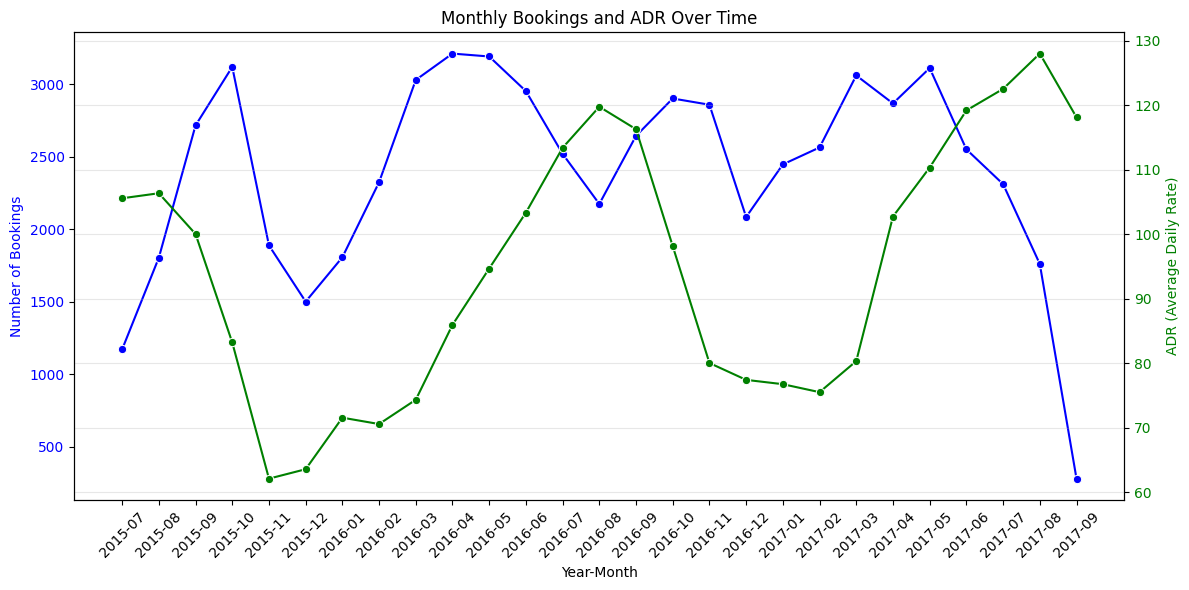

In [ ]:
def monthly_bookings_and_adr_over_time_line_chart():
  # Converting'reservation_status_date' column in datetime format
  df_cleaned2['reservation_status_date'] = pd.to_datetime(df_cleaned2['reservation_status_date'])

  # Filter out canceled bookings
  df_cleaned2_non_canceled = df_cleaned2[df_cleaned2['is_canceled'] == 0].copy()

  # Create a year-month column for grouping using .loc[]
  df_cleaned2_non_canceled.loc[:, 'year_month'] = df_cleaned2_non_canceled['reservation_status_date'].dt.to_period('M')

  # Group by year_month and count bookings
  monthly_bookings = df_cleaned2_non_canceled.groupby('year_month').size().reset_index(name='booking_count')

  # Group by year_month and calculate mean ADR
  adr_trend = df_cleaned2_non_canceled.groupby('year_month')['adr'].mean().reset_index()

  # Convert year_month to string for both dataframes
  monthly_bookings['year_month'] = monthly_bookings['year_month'].astype(str)
  adr_trend['year_month'] = adr_trend['year_month'].astype(str)

  # Create the figure and axis objects
  fig, ax1 = plt.subplots(figsize=(12,6))

  # Plot the number of bookings (blue line) on the first y-axis
  ax1.set_xlabel('Year-Month')
  ax1.set_ylabel('Number of Bookings', color='blue')
  sns.lineplot(data=monthly_bookings, x='year_month', y='booking_count', marker="o", color="blue", ax=ax1)
  ax1.tick_params(axis='y', labelcolor='blue')

  # Create the second y-axis for the ADR (green line)
  ax2 = ax1.twinx()
  ax2.set_ylabel('ADR (Average Daily Rate)', color='green')
  sns.lineplot(data=adr_trend, x='year_month', y='adr', marker="o", color="green", ax=ax2)
  ax2.tick_params(axis='y', labelcolor='green')

  # Show each month in the x-axis without skipping
  ax1.set_xticks(range(0, len(adr_trend['year_month'])))
  ax1.set_xticklabels(adr_trend['year_month'], rotation=45)  # Display all months with rotation for readability

  # Display the plot with proper layout
  plt.title('Monthly Bookings and ADR Over Time')
  plt.tight_layout()
  plt.grid(True, alpha=0.3)
  plt.show()

monthly_bookings_and_adr_over_time_line_chart()

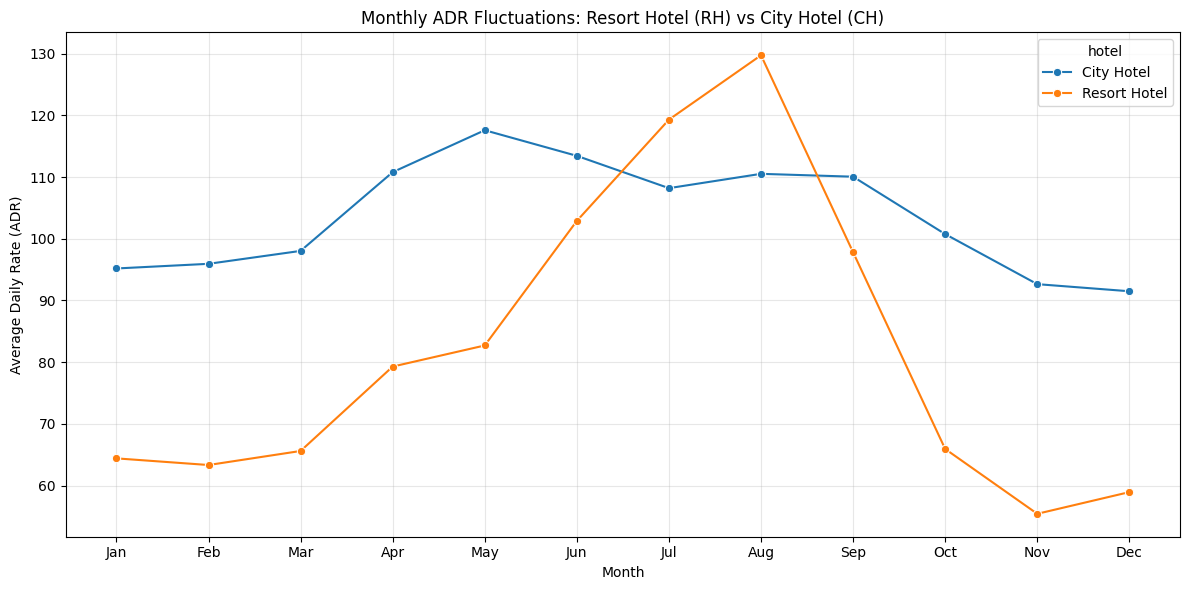

In [ ]:
def Monthly_ADR_Fluctuations_Resort_vs_City_Hotels():
  import warnings
  warnings.simplefilter(action='ignore', category=FutureWarning)
  # Create a new column for the month (for grouping purposes)
  df_cleaned2['month'] = pd.to_datetime(df_cleaned2['reservation_status_date']).dt.month

  # Group by hotel type and month, then calculate the mean ADR (average daily rate)
  monthly_adr = df_cleaned2.groupby(['hotel', 'month'])['adr'].mean().reset_index()

  # Plotting the ADR trends across months for both hotels (Resort and City Hotels)
  plt.figure(figsize=(12, 6))
  sns.lineplot(data=monthly_adr, x='month', y='adr', hue='hotel', marker="o")

  # Customize the plot
  plt.title('Monthly ADR Fluctuations: Resort Hotel (RH) vs City Hotel (CH)')
  plt.xlabel('Month')
  plt.ylabel('Average Daily Rate (ADR)')
  plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

Monthly_ADR_Fluctuations_Resort_vs_City_Hotels()

## Business Analysis 4

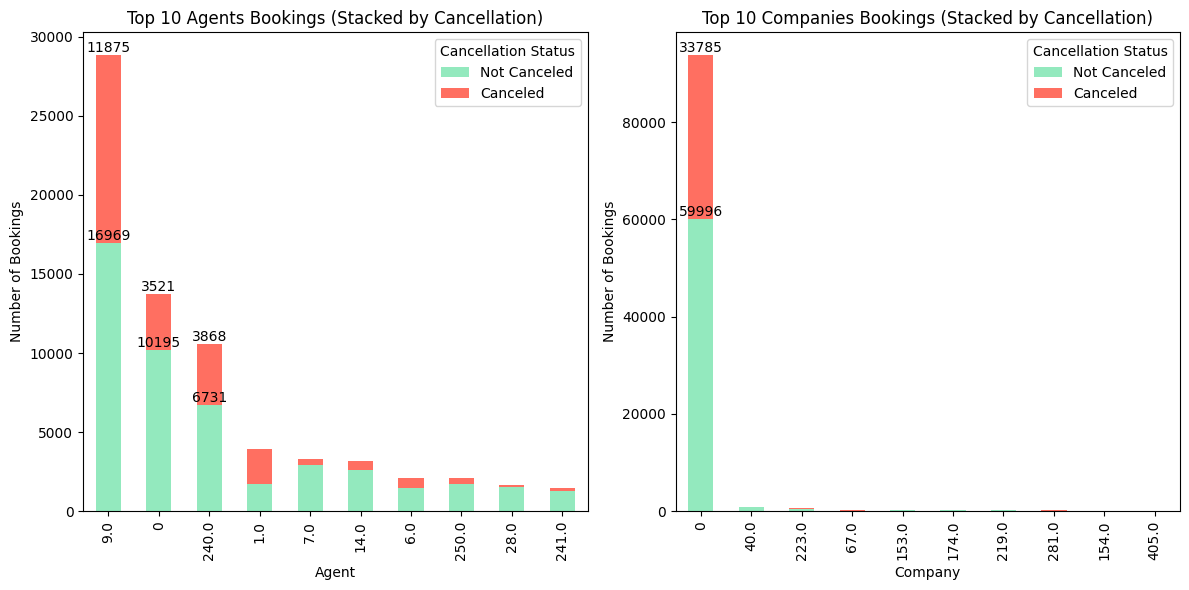

In [ ]:
def top_agents_and_companies():
  # Convert 'agent' and 'company' to string types for consistency
  df_cleaned2['agent'] = df_cleaned2['agent'].astype(str)
  df_cleaned2['company'] = df_cleaned2['company'].astype(str)

  # Group by agent and is_canceled, then count the bookings
  agent_bookings = df_cleaned2.groupby(['agent', 'is_canceled']).size().unstack(fill_value=0)

  # Group by company and is_canceled, then count the bookings
  company_bookings = df_cleaned2.groupby(['company', 'is_canceled']).size().unstack(fill_value=0)

  # Filter the top 10 agents and companies by total bookings
  top_agents = agent_bookings.sum(axis=1).nlargest(10).index
  top_companies = company_bookings.sum(axis=1).nlargest(10).index

  # Filter the data for these top 10 agents and companies
  top_agent_bookings = agent_bookings.loc[top_agents]
  top_company_bookings = company_bookings.loc[top_companies]

  # Plotting the stacked bar chart for agents and companies
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Plot for agents
  top_agent_bookings.plot(kind='bar', stacked=True, ax=axes[0], color=['#93E9BE','#FF6F61'])
  axes[0].set_title('Top 10 Agents Bookings (Stacked by Cancellation)')
  axes[0].set_xlabel('Agent')
  axes[0].set_ylabel('Number of Bookings')
  axes[0].legend(['Not Canceled', 'Canceled'], title='Cancellation Status')

  # Plot for companies
  top_company_bookings.plot(kind='bar', stacked=True, ax=axes[1], color=['#93E9BE','#FF6F61'])
  axes[1].set_title('Top 10 Companies Bookings (Stacked by Cancellation)')
  axes[1].set_xlabel('Company')
  axes[1].set_ylabel('Number of Bookings')
  axes[1].legend(['Not Canceled', 'Canceled'], title='Cancellation Status')

  # Add counts on top of selected bars
  for container in axes[0].containers:
      # Only label the top 3 bars for agents
      labels = [f'{int(v)}' if i < 3 else '' for i, v in enumerate(container.datavalues)]
      axes[0].bar_label(container, labels=labels)

  for container in axes[1].containers:
      # Only label the top bar for companies
      labels = [f'{int(v)}' if i < 1 else '' for i, v in enumerate(container.datavalues)]
      axes[1].bar_label(container, labels=labels)

  plt.tight_layout()
  plt.show()

top_agents_and_companies()

## Additional Insights & Analysis

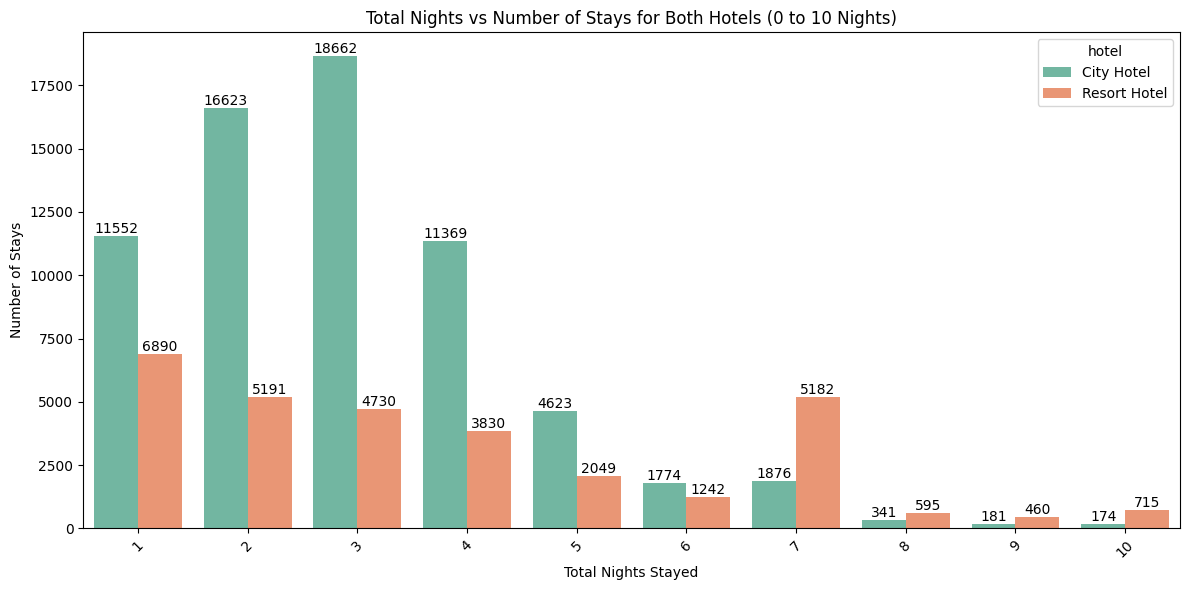

In [ ]:
def Total_Nights_vs_Number_of_Stays_for_Both_Hotels():
  # Calculate total nights by summing weekend and weeknights
  df_cleaned2['total_nights'] = df_cleaned2['stays_in_weekend_nights'] + df_cleaned2['stays_in_week_nights']

  # Group by hotel type and total nights, then count the number of stays
  nights_stay_count = df_cleaned2.groupby(['hotel', 'total_nights']).size().reset_index(name='num_of_stays')

  # Filter for entries where total_nights is between 0 and 10
  nights_stay_count_filtered = nights_stay_count[(nights_stay_count['total_nights'] >= 0) & (nights_stay_count['total_nights'] <= 10)]

  # Plot a bar chart for both hotel types
  plt.figure(figsize=(12, 6))
  ax = sns.barplot(data=nights_stay_count_filtered, x='total_nights', y='num_of_stays', hue='hotel', palette='Set2')

  # Add counts on top of each bar
  for container in ax.containers:
      ax.bar_label(container)

  # Add labels and title
  plt.title('Total Nights vs Number of Stays for Both Hotels (0 to 10 Nights)')
  plt.xlabel('Total Nights Stayed')
  plt.ylabel('Number of Stays')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Total_Nights_vs_Number_of_Stays_for_Both_Hotels()

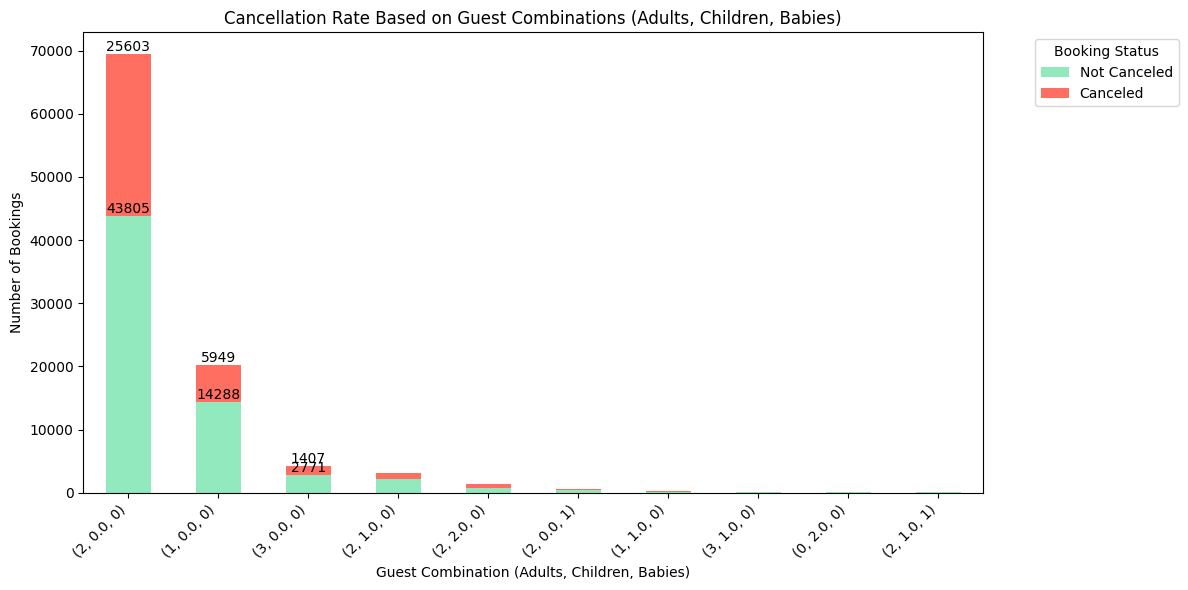

In [ ]:
def Cancellation_Rate_Based_on_Guests_Combination():
  # Group by guest combination and cancellation status
  guest_comb_cancellation = df_cleaned2.groupby(['adults', 'children', 'babies', 'is_canceled']).size().reset_index(name='count')

  # Pivot the data for a stacked bar chart structure
  pivot_data = guest_comb_cancellation.pivot_table(index=['adults', 'children', 'babies'],
                                                  columns='is_canceled', values='count', fill_value=0).reset_index()

  # Rename the columns for better readability
  pivot_data.columns = ['adults', 'children', 'babies', 'Not Canceled', 'Canceled']

  # Calculate the total bookings for each guest combination
  pivot_data['Total Bookings'] = pivot_data['Not Canceled'] + pivot_data['Canceled']

  # Sort the combinations by total bookings to display the most common ones
  pivot_data = pivot_data.sort_values(by='Total Bookings', ascending=False).head(10)

  # Plot a stacked bar chart
  cr = pivot_data.set_index(['adults', 'children', 'babies'])[['Not Canceled', 'Canceled']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#93E9BE','#FF6F61'])

  # Add counts on top of each bar
  for container in cr.containers:
      # Only label the top 3 bars
      labels = [f'{int(v)}' if i < 3 else '' for i, v in enumerate(container.datavalues)]
      cr.bar_label(container, labels=labels)

  # Customize the chart
  plt.title('Cancellation Rate Based on Guest Combinations (Adults, Children, Babies)')
  plt.xlabel('Guest Combination (Adults, Children, Babies)')
  plt.ylabel('Number of Bookings')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title="Booking Status", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  # Show the plot
  plt.show()
Cancellation_Rate_Based_on_Guests_Combination()

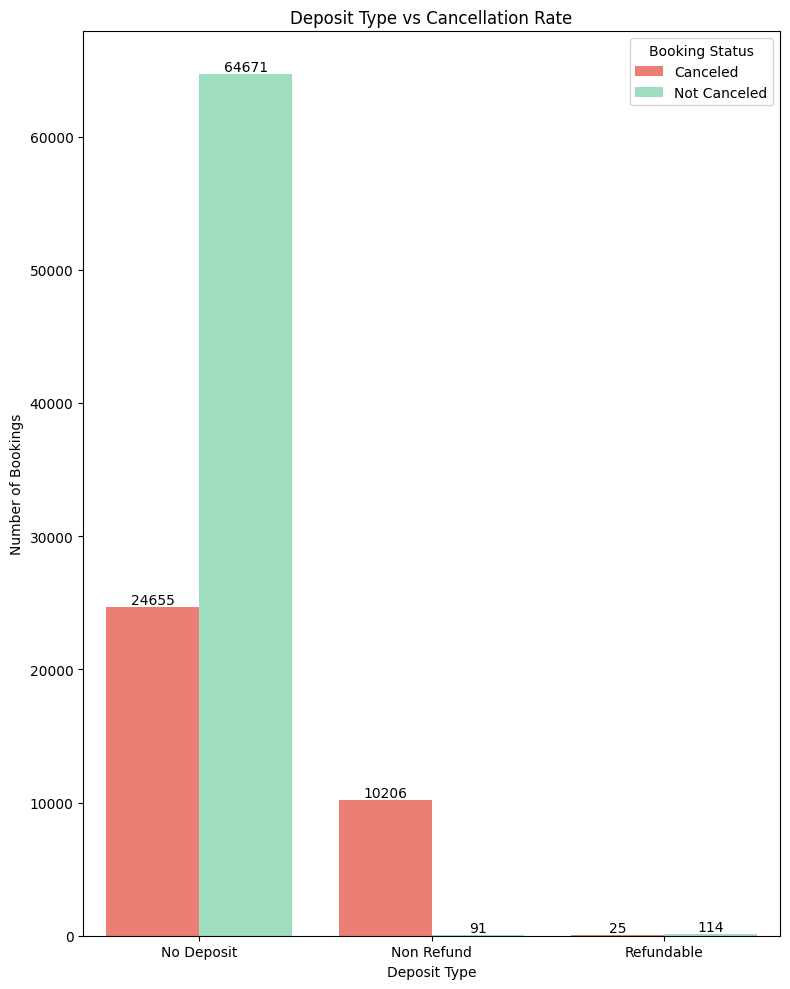

In [ ]:
def deposit_type_vs_cancellation_rate():
  # Group by deposit type and cancellation status
  deposit_cancel = df_cleaned2.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0).reset_index()

  # Rename columns for clarity
  deposit_cancel.columns = ['deposit_type', 'Not Canceled', 'Canceled']

  # Melt the dataframe for easier plotting
  deposit_melted = deposit_cancel.melt(id_vars='deposit_type', value_vars=['Canceled', 'Not Canceled'],
                                      var_name='Booking Status', value_name='Number of Bookings')

  # Plot a grouped bar chart for deposit type vs cancellation rate
  plt.figure(figsize=(8, 10))
  dc = sns.barplot(x='deposit_type', y='Number of Bookings', hue='Booking Status', data=deposit_melted, palette=['#FF6F61','#93E9BE'])

  # Add counts on top of each bar
  for container in dc.containers:
      dc.bar_label(container)

  # Customize the plot
  plt.title('Deposit Type vs Cancellation Rate')
  plt.xlabel('Deposit Type')
  plt.ylabel('Number of Bookings')
  plt.tight_layout()

  # Show the plot
  plt.show()
deposit_type_vs_cancellation_rate()

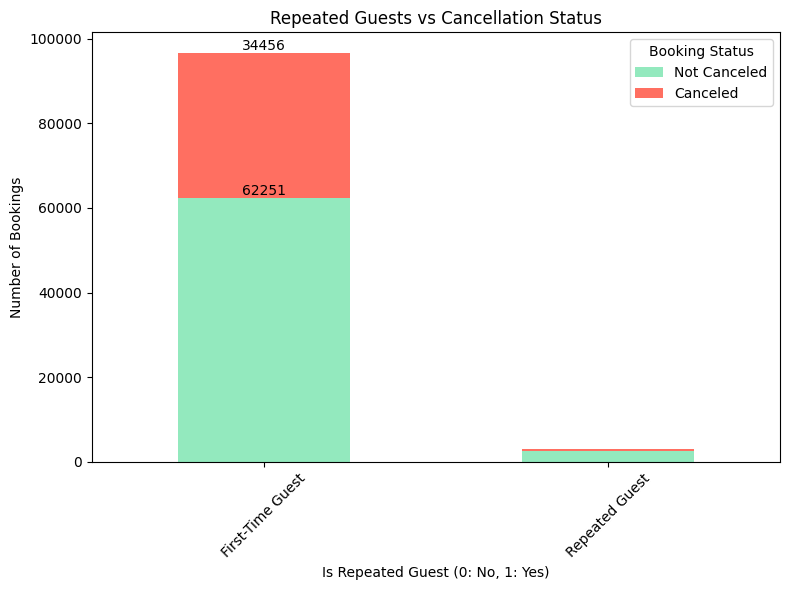

In [ ]:
def Repeated_Guests_Vs_Cancellation_Status():
  # Group by repeated guest status and cancellation status
  repeat_vs_cancel = df_cleaned2.groupby(['is_repeated_guest', 'is_canceled']).size().unstack(fill_value=0)

  # Rename columns for clarity
  repeat_vs_cancel.columns = ['Not Canceled', 'Canceled']

  # Plot a stacked bar chart for repeated guests vs cancellation status
  rg = repeat_vs_cancel.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#93E9BE','#FF6F61'])

  # Add counts on top of each bar
  for container in rg.containers:
      # Only label the top bar
      labels = [f'{int(v)}' if i == 0 else '' for i, v in enumerate(container.datavalues)]
      rg.bar_label(container, labels=labels)

  # Customize the plot
  plt.title('Repeated Guests vs Cancellation Status')
  plt.xlabel('Is Repeated Guest (0: No, 1: Yes)')
  plt.ylabel('Number of Bookings')
  plt.xticks([0, 1], labels=['First-Time Guest', 'Repeated Guest'], rotation=45)
  plt.legend(title="Booking Status", loc='upper right')
  plt.tight_layout()

  # Show the plot
  plt.show()

Repeated_Guests_Vs_Cancellation_Status()

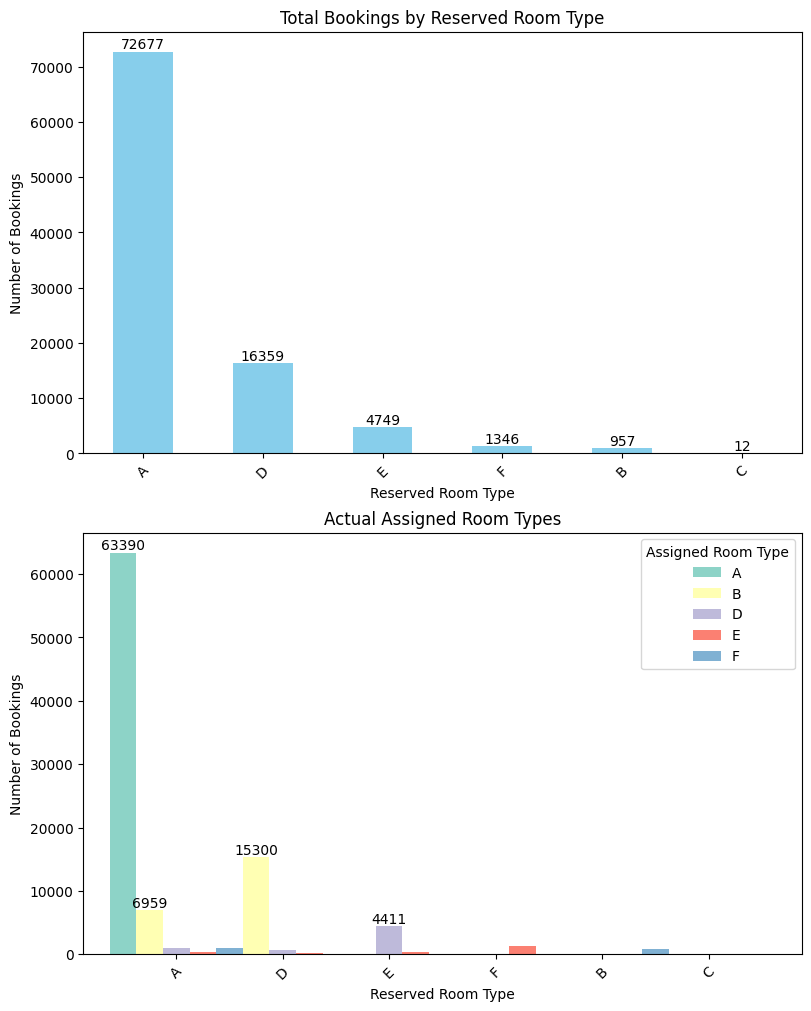

In [ ]:
def Total_Bookings_By_Reserved_Room_Type():
    # Count the bookings based on reserved and assigned room types
    room_type_counts = df_cleaned2.groupby(['reserved_room_type', 'assigned_room_type']).size().reset_index(name='count')

    # Calculate total bookings for each reserved room type
    total_bookings = room_type_counts.groupby('reserved_room_type')['count'].sum().reset_index(name='total_count')

    # Filter for the top 5 assigned room types based on total bookings
    top_assigned_rooms = room_type_counts.groupby('assigned_room_type')['count'].sum().nlargest(5).index
    filtered_counts = room_type_counts[room_type_counts['assigned_room_type'].isin(top_assigned_rooms)]

    # Create a DataFrame to summarize counts
    room_type_summary = filtered_counts.pivot_table(
        index='reserved_room_type',
        columns='assigned_room_type',
        values='count',
        fill_value=0
    )

    # Reset index for better visualization
    room_type_summary.reset_index(inplace=True)

    # Remove room types G, H, and L
    room_type_summary = room_type_summary[~room_type_summary['reserved_room_type'].isin(['G', 'H', 'L'])]

    # Calculate the total bookings and insert it at the beginning
    room_type_summary['Total'] = room_type_summary[top_assigned_rooms].sum(axis=1)

    # Sort the room type summary based on the Total column in descending order
    room_type_summary.sort_values(by='Total', ascending=False, inplace=True)

    # Prepare columns for plotting: 'Total' first, then the assigned room types sorted by their totals
    sorted_cols = ['Total'] + [room for room in top_assigned_rooms if room in room_type_summary.columns]
    room_type_summary = room_type_summary[['reserved_room_type'] + sorted_cols]

    # Create a figure with 2 subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), constrained_layout=True)

    # Plotting Total Bookings by Reserved Room Type
    room_type_summary.set_index('reserved_room_type')['Total'].plot(
        kind='bar', color='skyblue', ax=axes[0]
    )

    # Add counts on top of each bar
    for container in axes[0].containers:
        axes[0].bar_label(container)

    # Customize the plot
    axes[0].set_title('Total Bookings by Reserved Room Type')
    axes[0].set_xlabel('Reserved Room Type')
    axes[0].set_ylabel('Number of Bookings')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot Actual Assigned Room Types
    room_type_summary.set_index('reserved_room_type').drop(columns=['Total']).plot(
        kind='bar', stacked=False, color=sns.color_palette("Set3", n_colors=len(top_assigned_rooms)), width=1.25, ax=axes[1]
    )

    # Add counts on top of each bar
    for container in axes[1].containers:
        labels = [f'{int(v)}' if v > 4000 else '' for v in container.datavalues]
        axes[1].bar_label(container, labels=labels)

    # Customize the plot
    axes[1].set_title('Actual Assigned Room Types')
    axes[1].set_xlabel('Reserved Room Type')
    axes[1].set_ylabel('Number of Bookings')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Assigned Room Type', labels=['A', 'B', 'D', 'E', 'F'])

    # Show the plots
    plt.show()

Total_Bookings_By_Reserved_Room_Type()

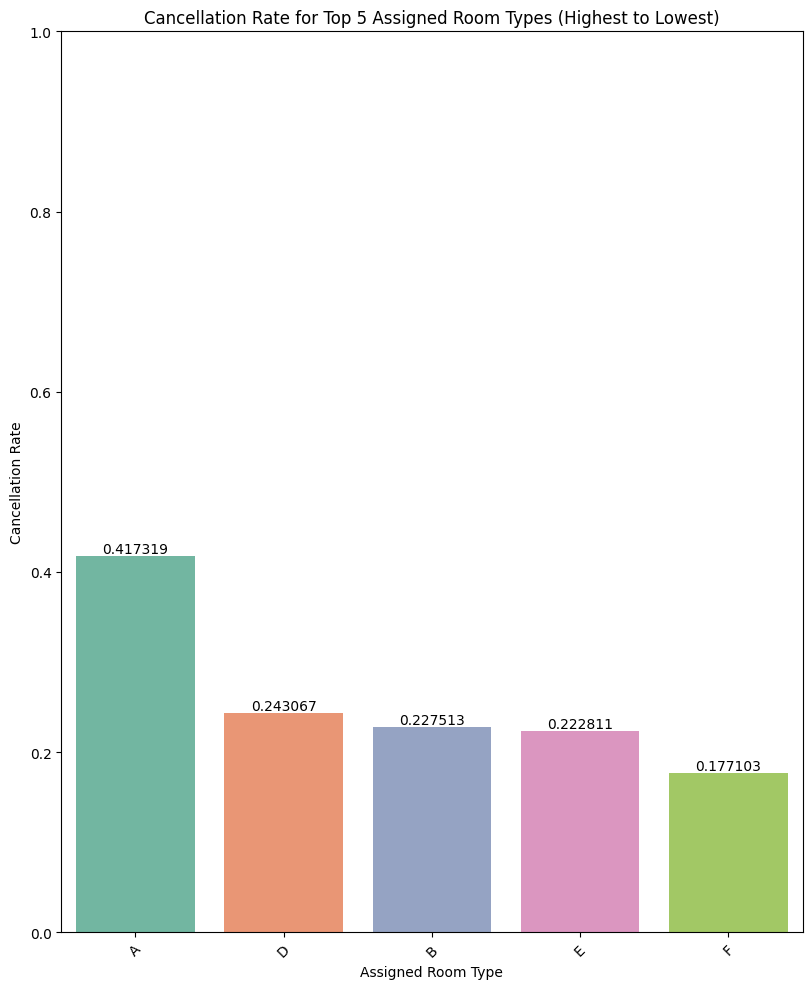

In [ ]:
def cancellation_rate_for_top_assigned_rooms():
  # Count the bookings based on assigned room types and cancellations
  room_type_cancellation = df_cleaned2.groupby(['assigned_room_type']).agg(
      total_bookings=('is_canceled', 'size'),
      total_cancellations=('is_canceled', 'sum')
  ).reset_index()

  # Calculate the cancellation rate
  room_type_cancellation['cancellation_rate'] = room_type_cancellation['total_cancellations'] / room_type_cancellation['total_bookings']

  # Identify the top 5 most assigned room types based on total bookings
  top_assigned_rooms = room_type_cancellation.nlargest(5, 'total_bookings')

  # Sort the top assigned rooms by cancellation rate from highest to lowest
  top_assigned_rooms = top_assigned_rooms.sort_values(by='cancellation_rate', ascending=False)

  # Plotting the cancellation rate for the top 5 assigned room types
  plt.figure(figsize=(8.225, 10))
  crt5 = sns.barplot(data=top_assigned_rooms, x='assigned_room_type', y='cancellation_rate', palette='Set2') # assign plot to crt5

  # Customize the plot
  plt.title('Cancellation Rate for Top 5 Assigned Room Types (Highest to Lowest)')
  plt.xlabel('Assigned Room Type')
  plt.ylabel('Cancellation Rate')
  plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
  plt.xticks(rotation=45)
  plt.tight_layout()

  # Add counts on top of each bar
  for container in crt5.containers:
      crt5.bar_label(container)

  # Show the plot
  plt.show()

cancellation_rate_for_top_assigned_rooms()

# Menu App 💻 (Please run codes above before proceeding)


Welcome to the Hotel Booking Analysis Visualization Menu!
Enter 1 for Data Exploration (EDA)
Enter 2 for Data Cleaning / Wrangling
Enter 3 for Data processing and Analysis
Enter 0 to end the menu.
Enter your Option: 1

You have selected Data Exploration (EDA)
Enter 1 to display Summary of the dataset information
Enter 2 to Identify variable of missing values
Enter 3 to Explore categorical and numerical variable
Enter 4 to display the number of unique items
Enter 5 to display Correlation Matrix Heatmap
Enter 0 to exit to main menu
Enter your category: 1
Displaying the first few rows of the DataFrame:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015          

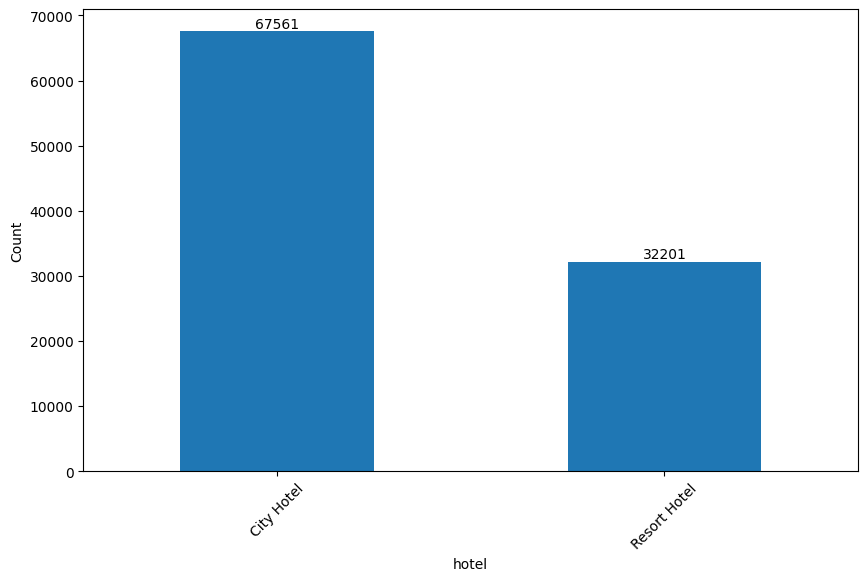


Bar Chart for arrival_date_month:



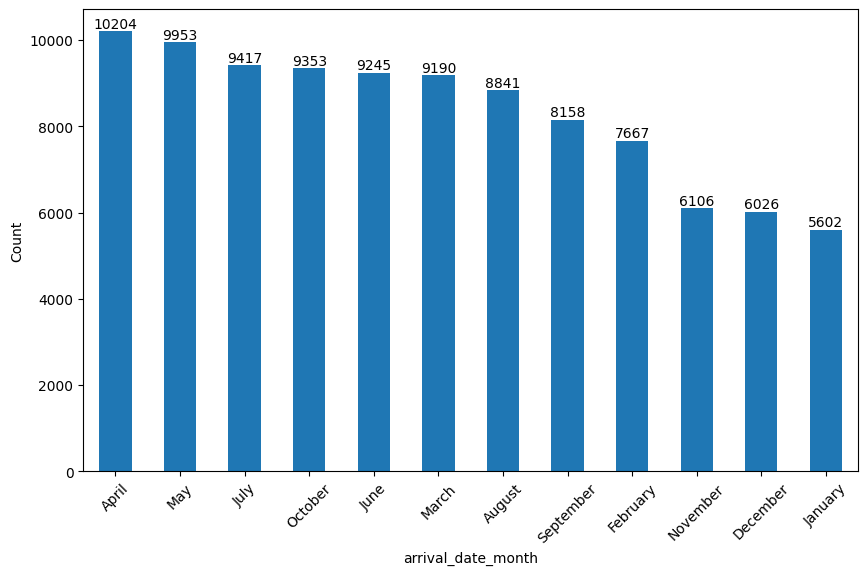


Bar Chart for meal:



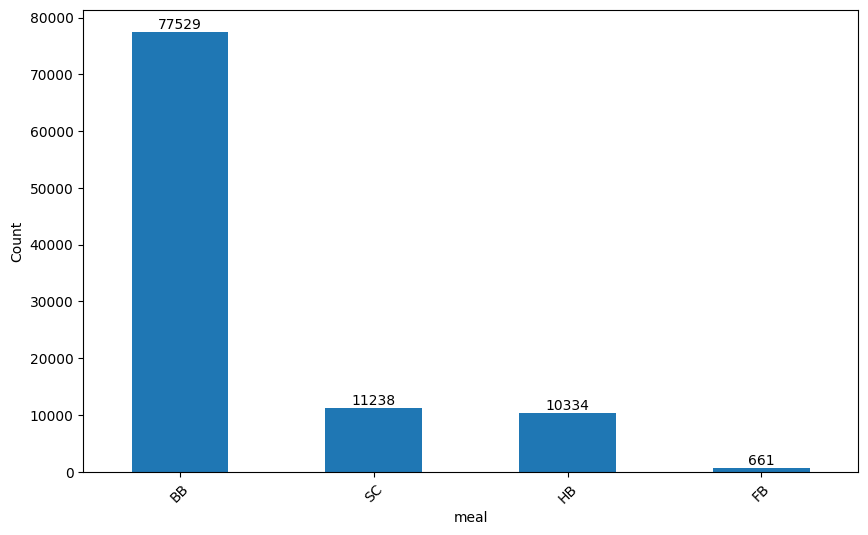


Bar Chart for market_segment:



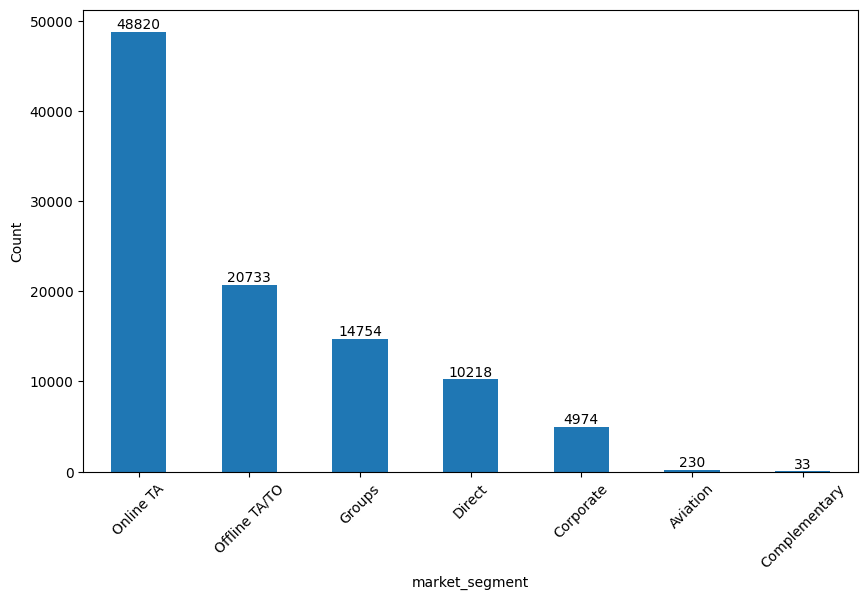


Bar Chart for distribution_channel:



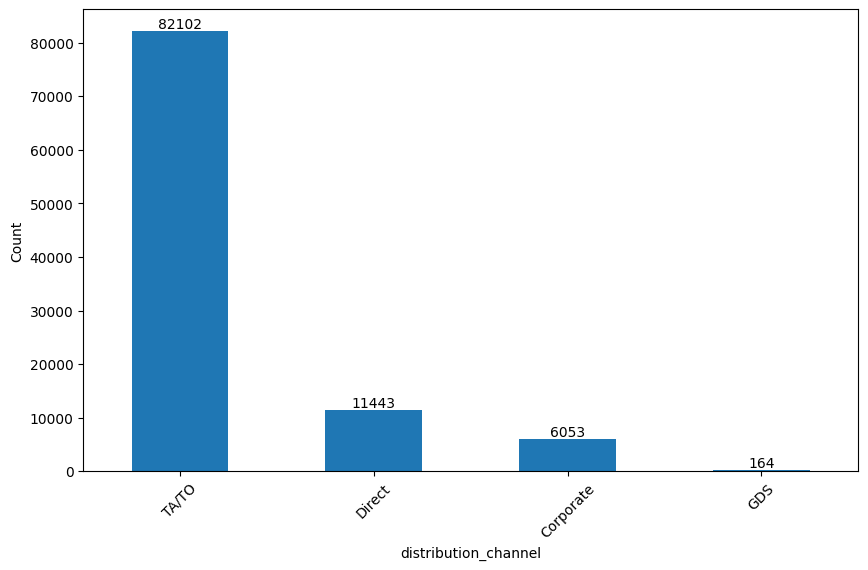


Bar Chart for reserved_room_type:



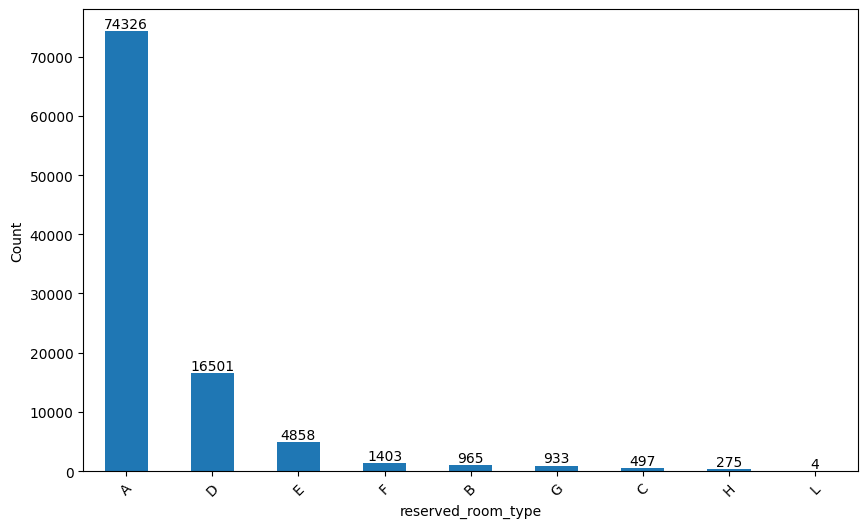


Bar Chart for assigned_room_type:



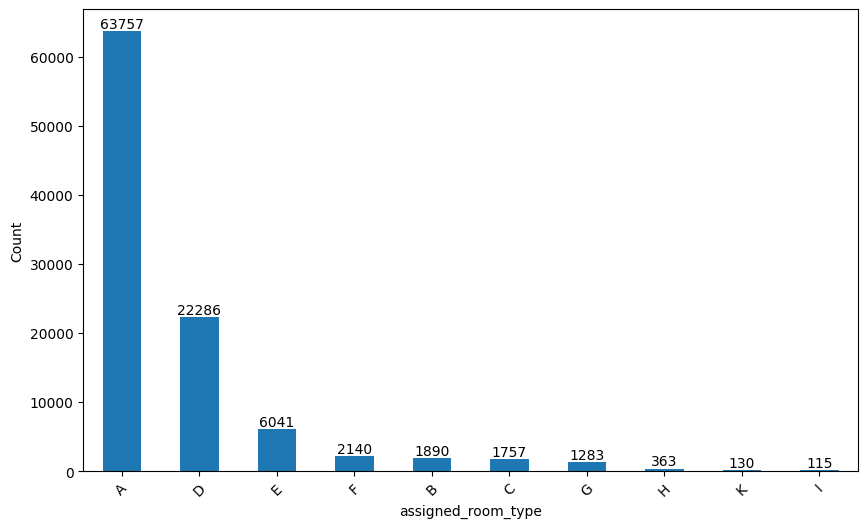


Bar Chart for deposit_type:



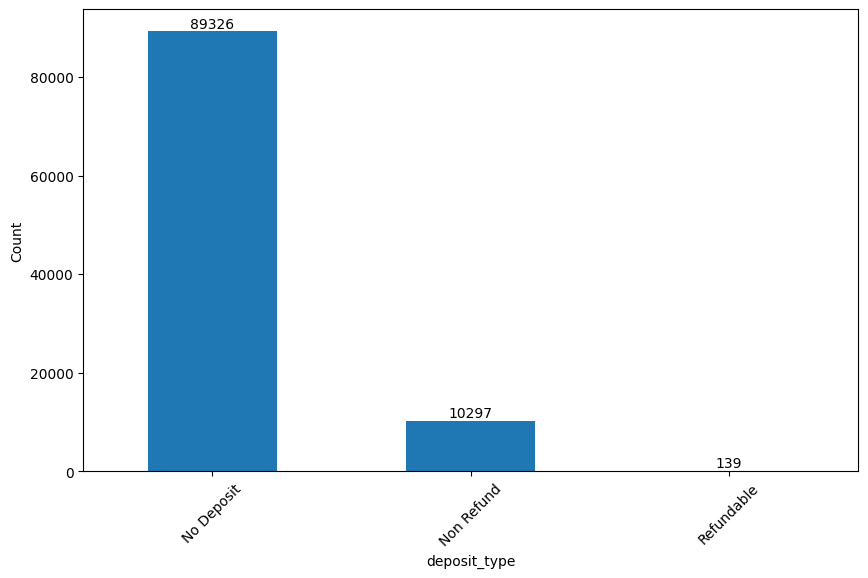


Bar Chart for customer_type:



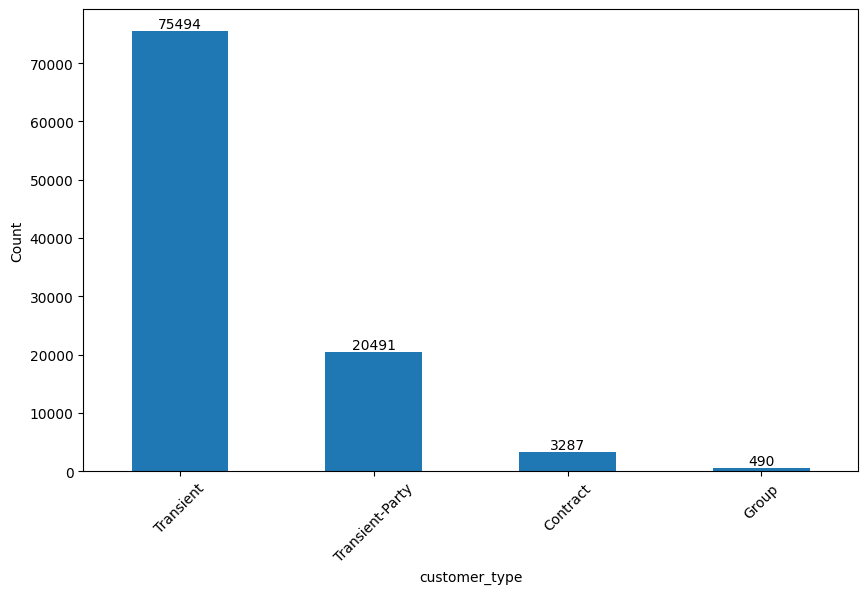


Bar Chart for reservation_status:



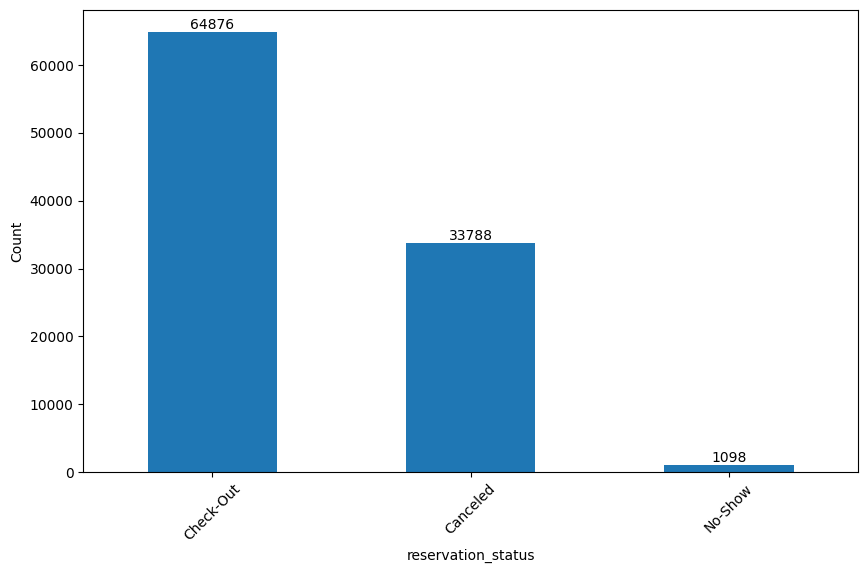


Bar Chart for Top 10 country:



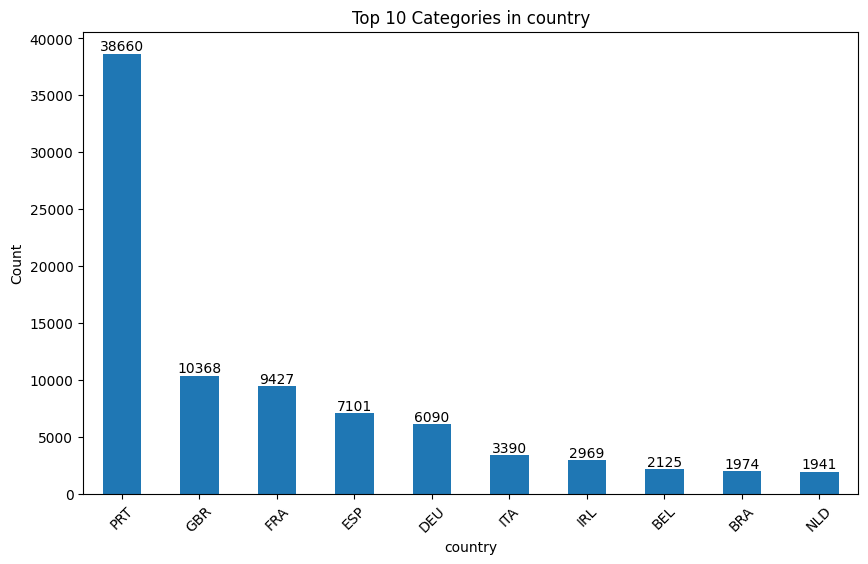


Bar Chart for Top 10 agent:



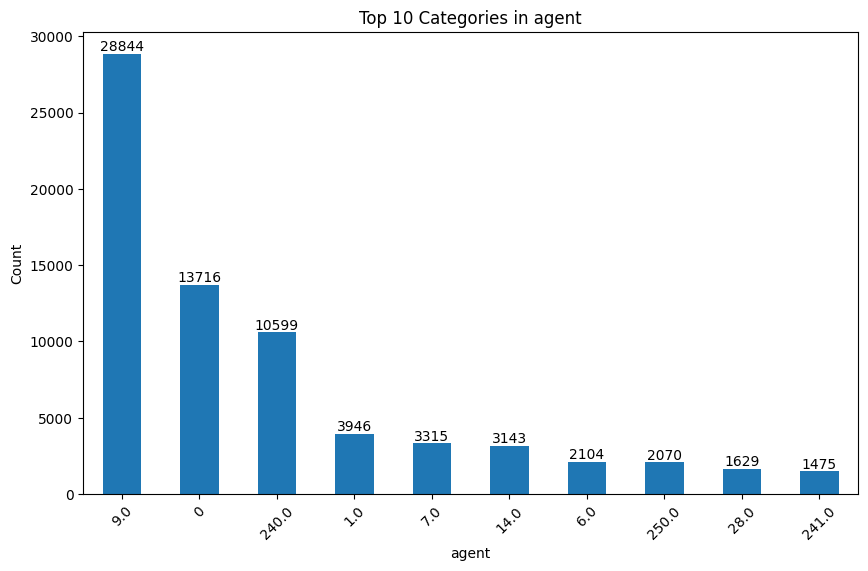


Bar Chart for Top 10 company:



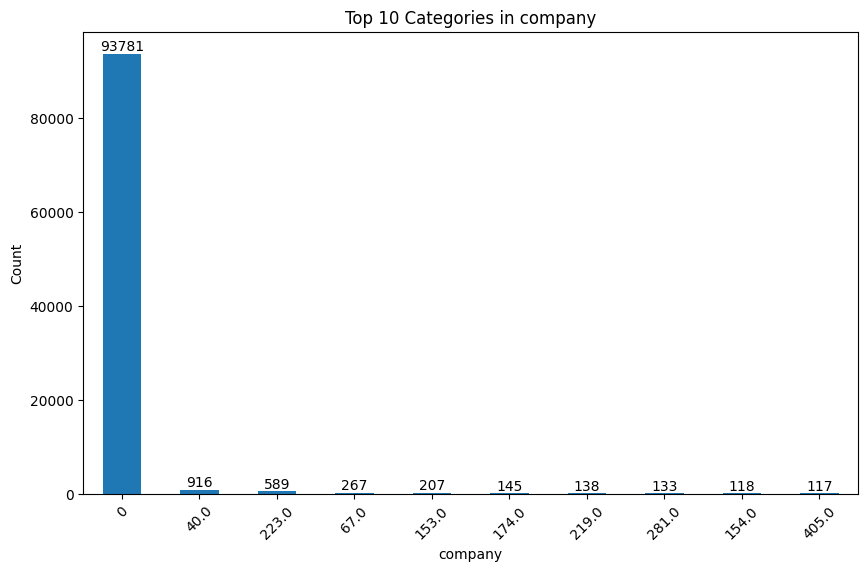


Bar Chart for Top 10 reservation_status_date:



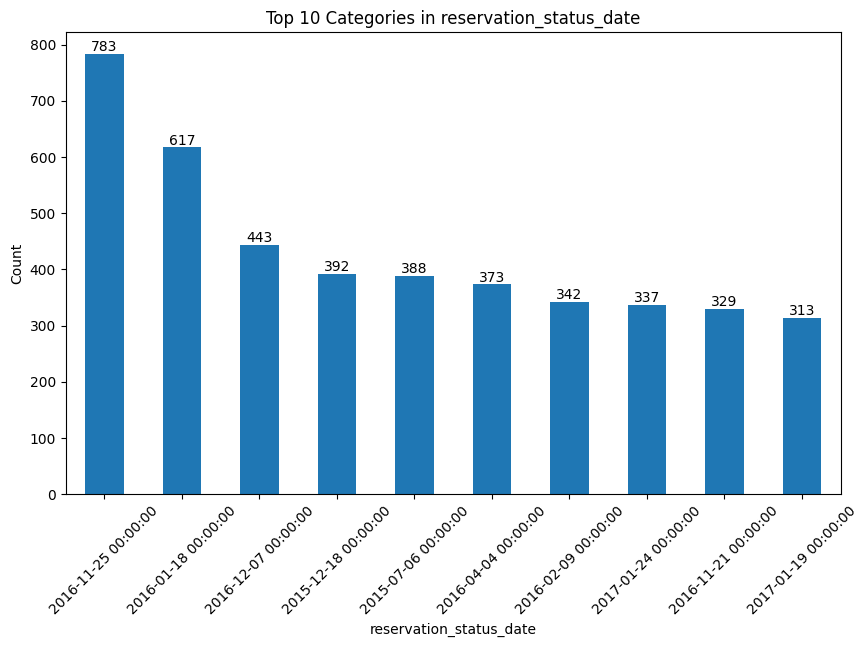

Displaying Numerical Variables


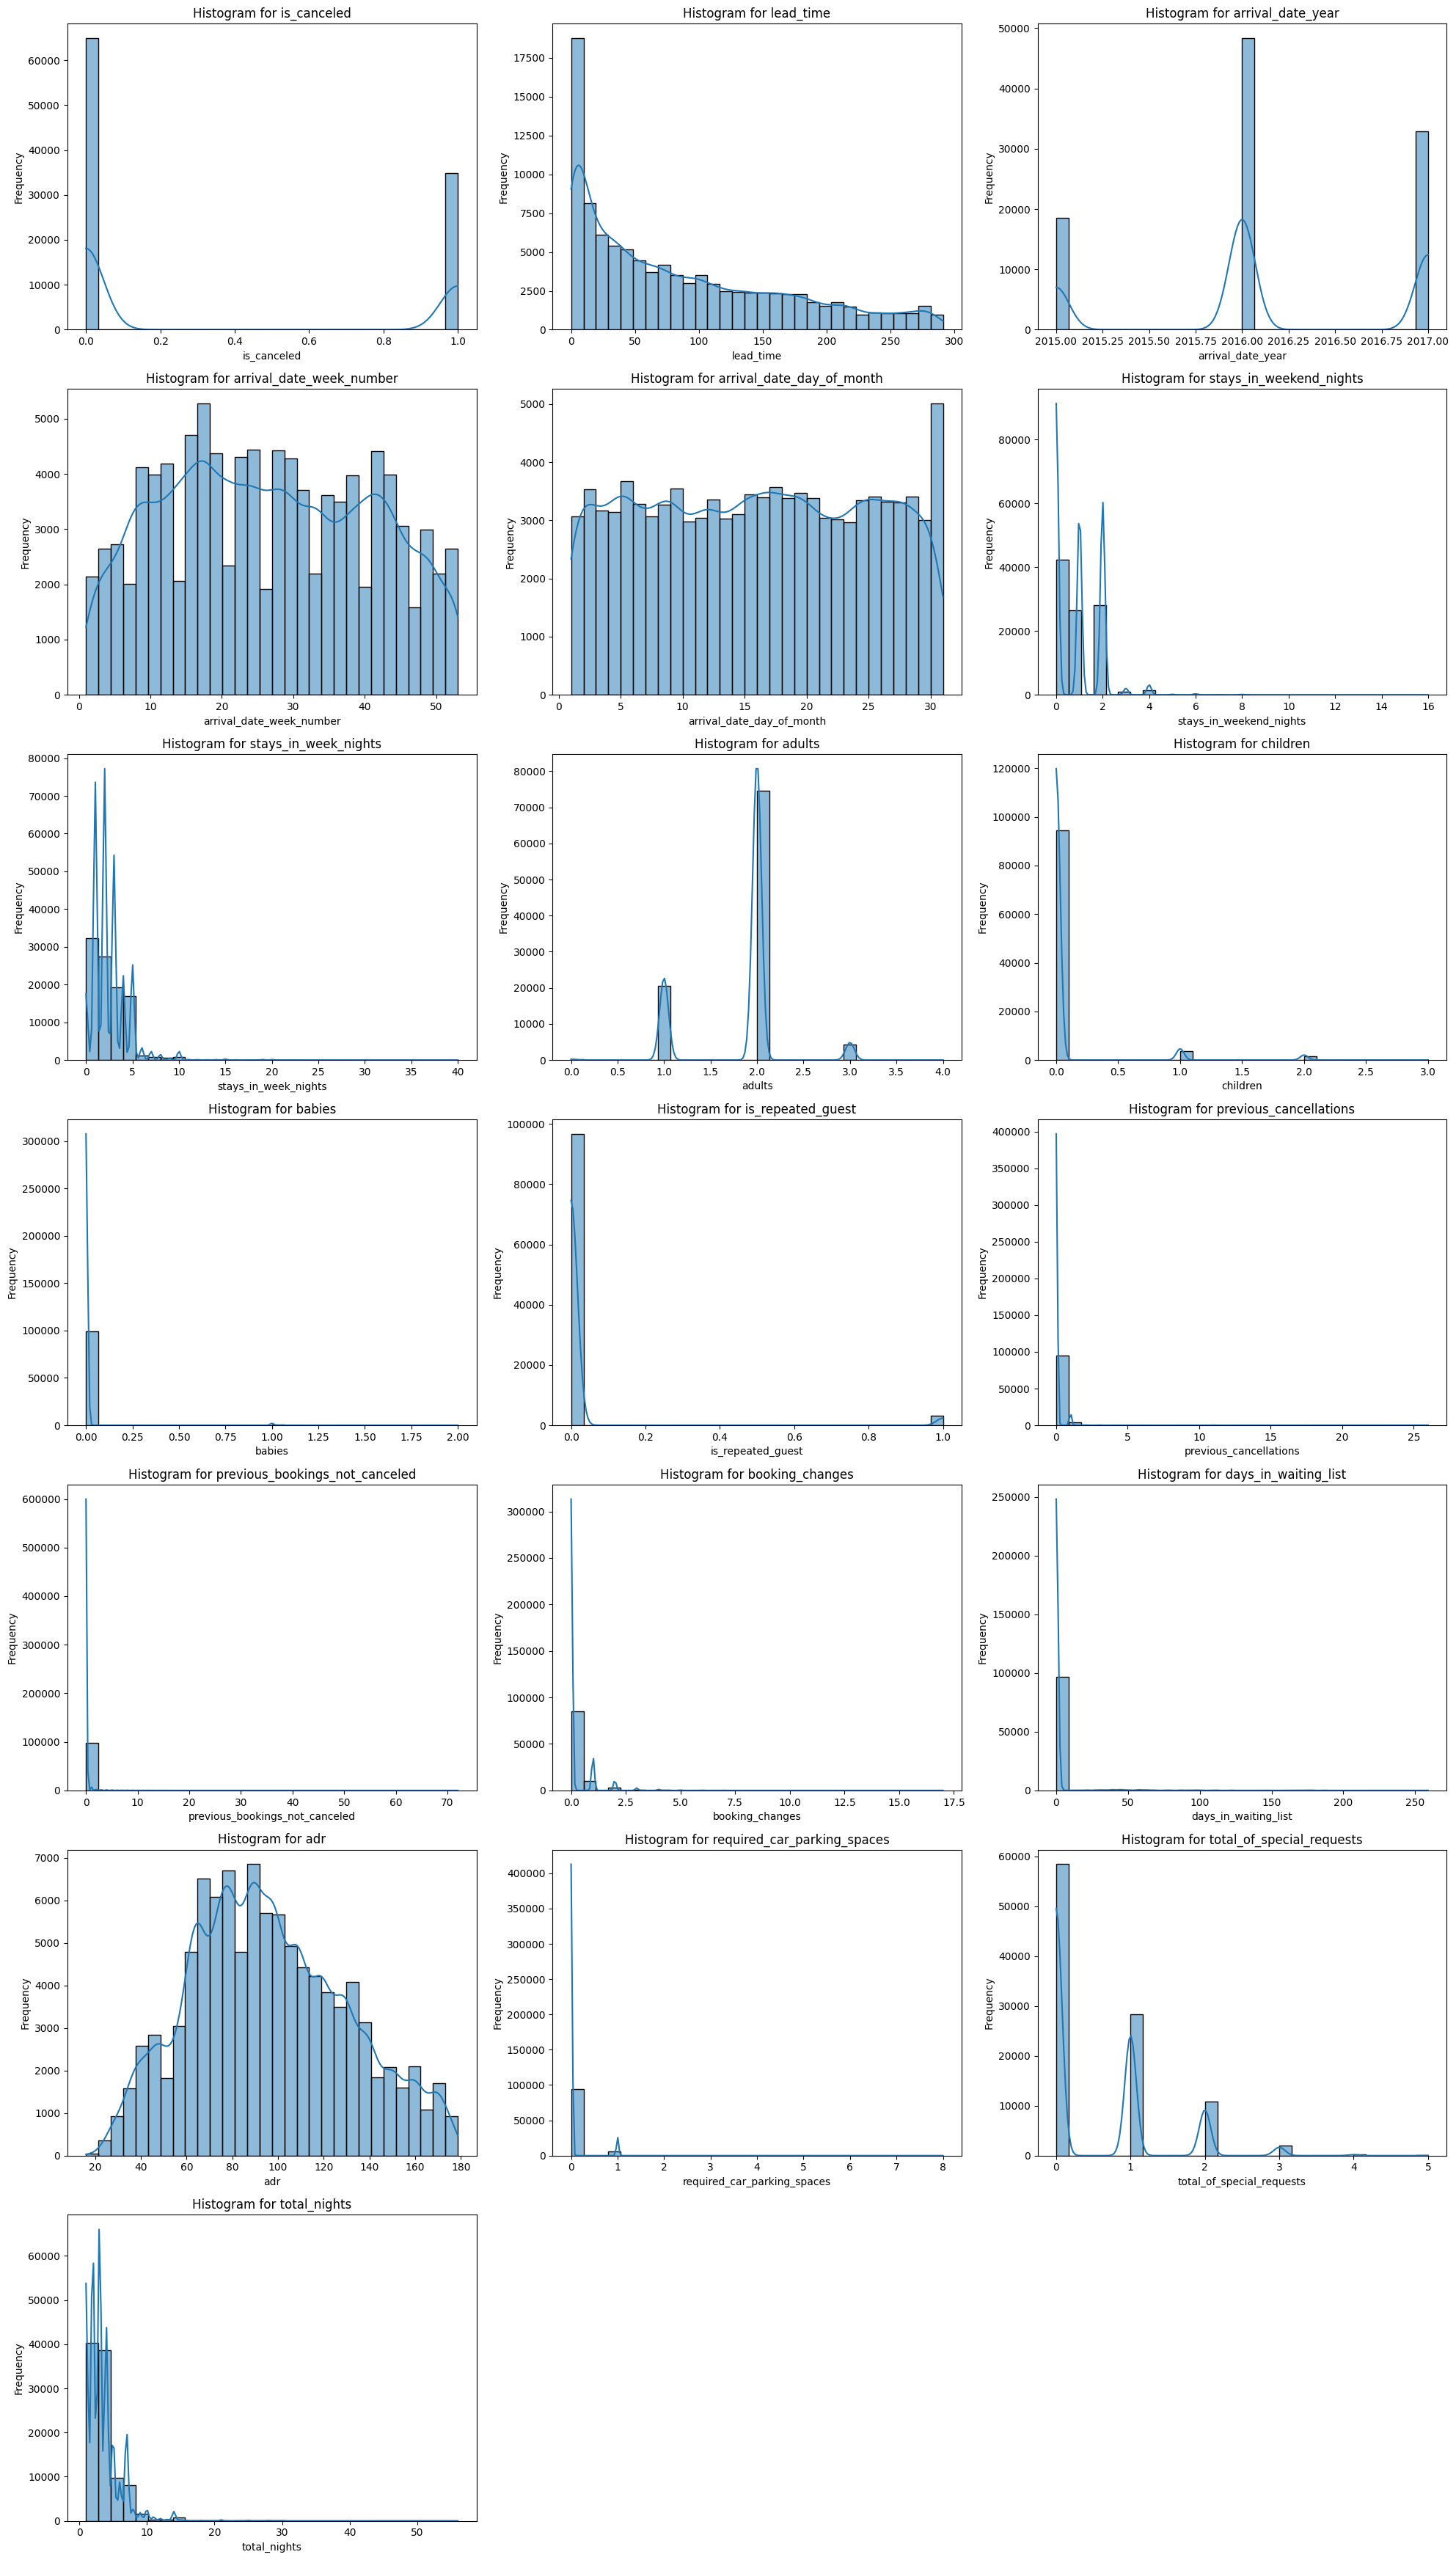


You have selected Data Exploration (EDA)
Enter 1 to display Summary of the dataset information
Enter 2 to Identify variable of missing values
Enter 3 to Explore categorical and numerical variable
Enter 4 to display the number of unique items
Enter 5 to display Correlation Matrix Heatmap
Enter 0 to exit to main menu
Enter your category: 4
Displaying the number of unique items in each column:
hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel

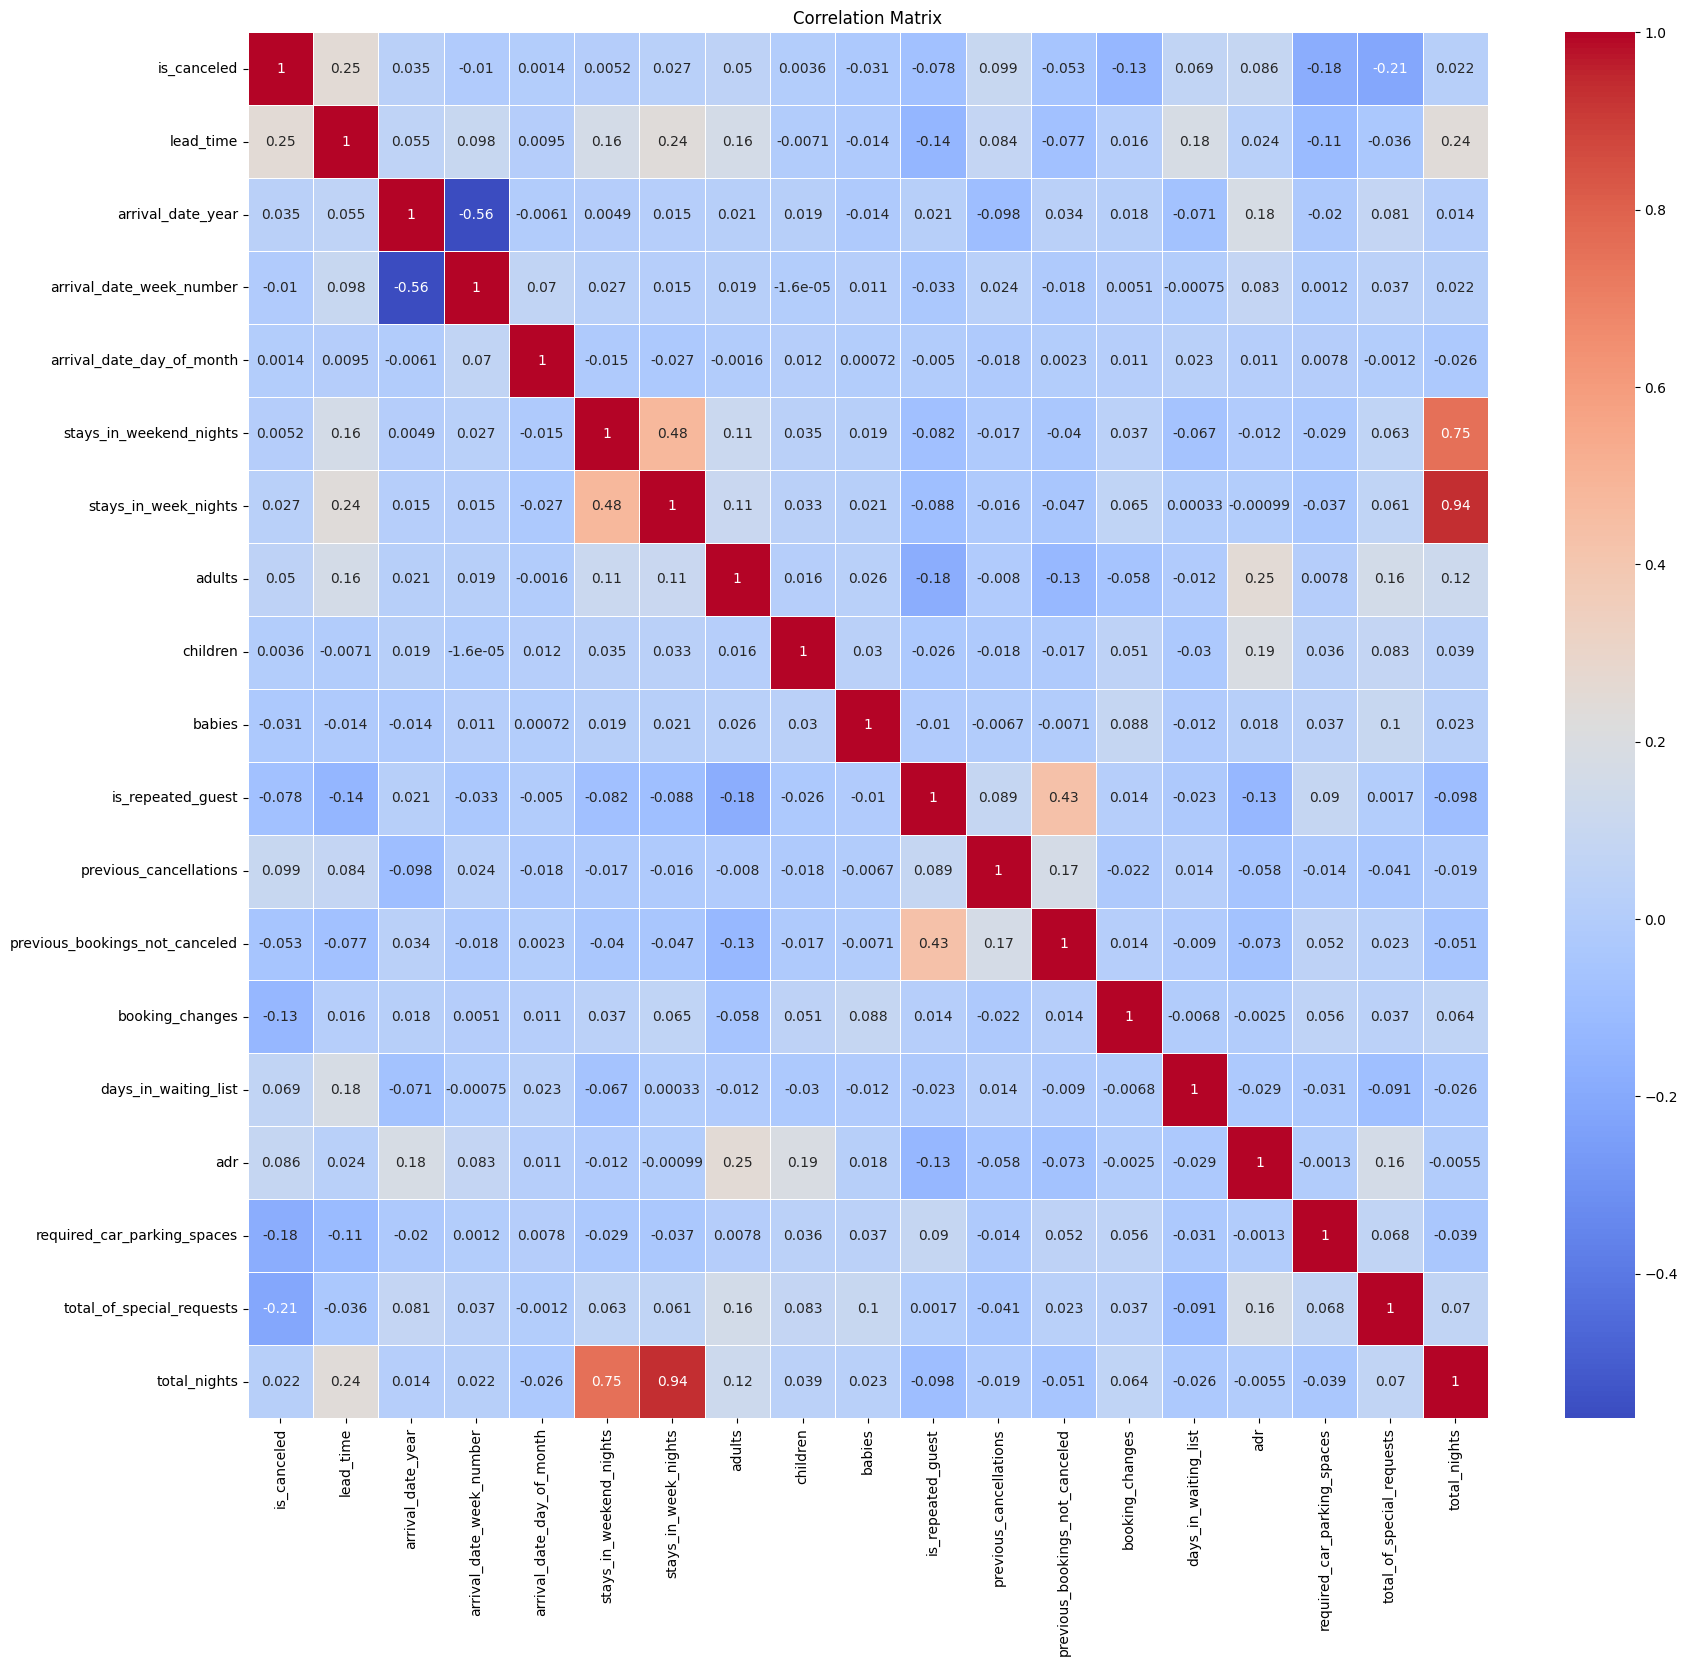


You have selected Data Exploration (EDA)
Enter 1 to display Summary of the dataset information
Enter 2 to Identify variable of missing values
Enter 3 to Explore categorical and numerical variable
Enter 4 to display the number of unique items
Enter 5 to display Correlation Matrix Heatmap
Enter 0 to exit to main menu
Enter your category: 0
Returning to Main Menu...

Welcome to the Hotel Booking Analysis Visualization Menu!
Enter 1 for Data Exploration (EDA)
Enter 2 for Data Cleaning / Wrangling
Enter 3 for Data processing and Analysis
Enter 0 to end the menu.
Enter your Option: 2

You have selected Data Cleaning / Wrangling
Enter 1 to display Replacing Null Values
Enter 2 to display Dropped Null Values
Enter 3 to display Outliers handling
Enter 0 to exit to main menu
Enter your category: 1
Null values in children,agent and company rows are replaced by 0
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388   

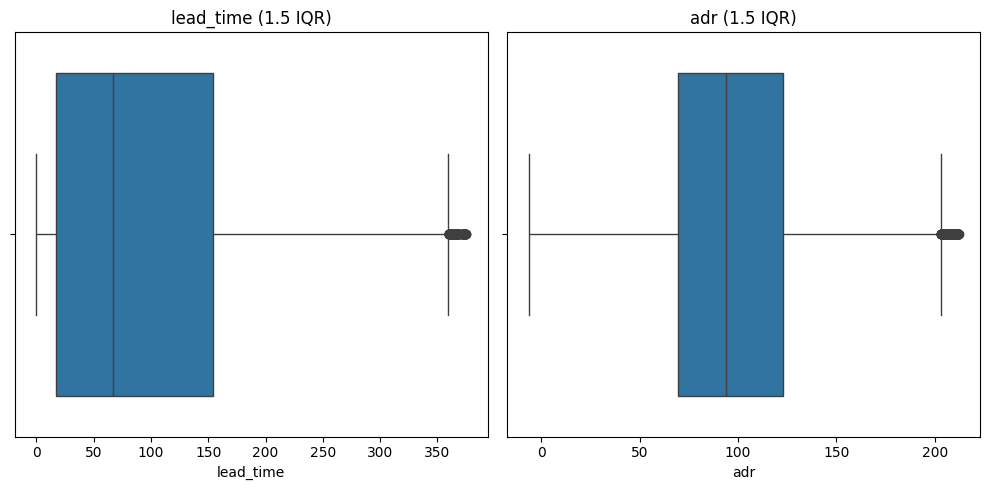

Displaying After removal of outliers in dataset of ADR and Lead Time


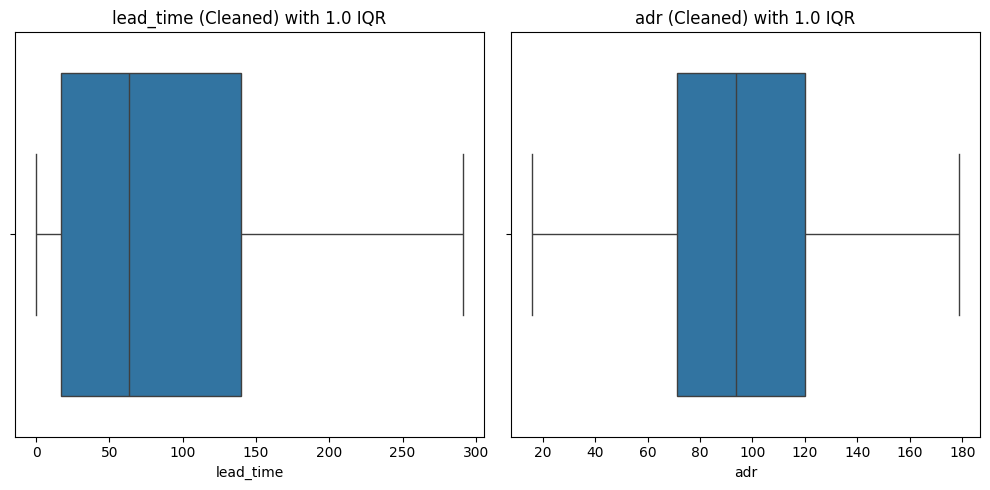


You have selected Data Cleaning / Wrangling
Enter 1 to display Replacing Null Values
Enter 2 to display Dropped Null Values
Enter 3 to display Outliers handling
Enter 0 to exit to main menu
Enter your category: 0
Returning to Main Menu...

Welcome to the Hotel Booking Analysis Visualization Menu!
Enter 1 for Data Exploration (EDA)
Enter 2 for Data Cleaning / Wrangling
Enter 3 for Data processing and Analysis
Enter 0 to end the menu.
Enter your Option: 3

You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loy

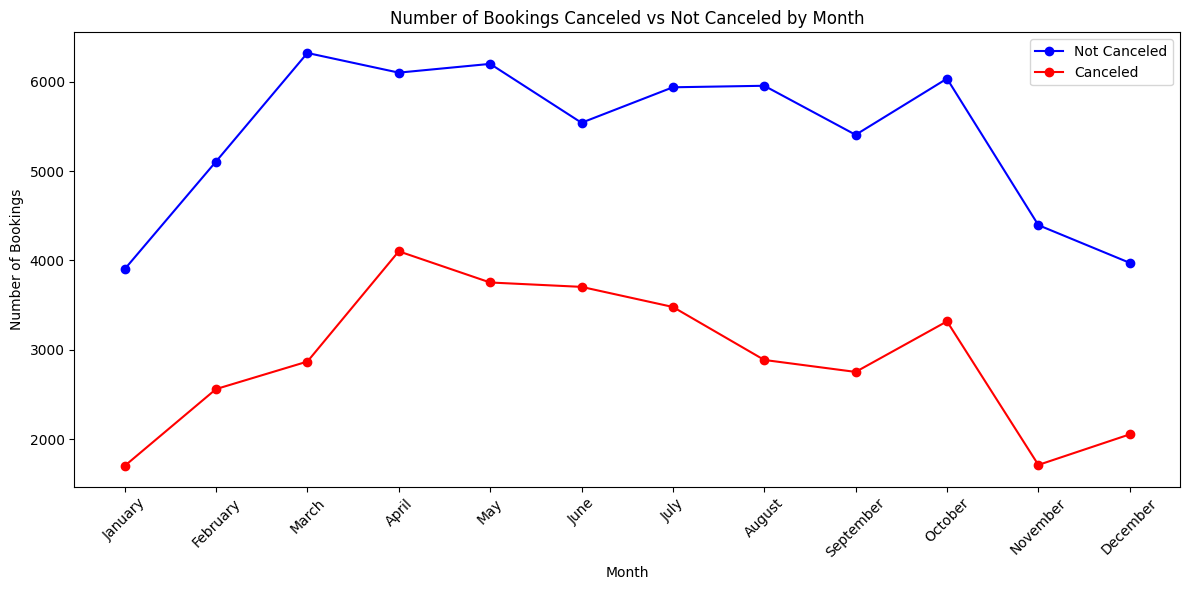

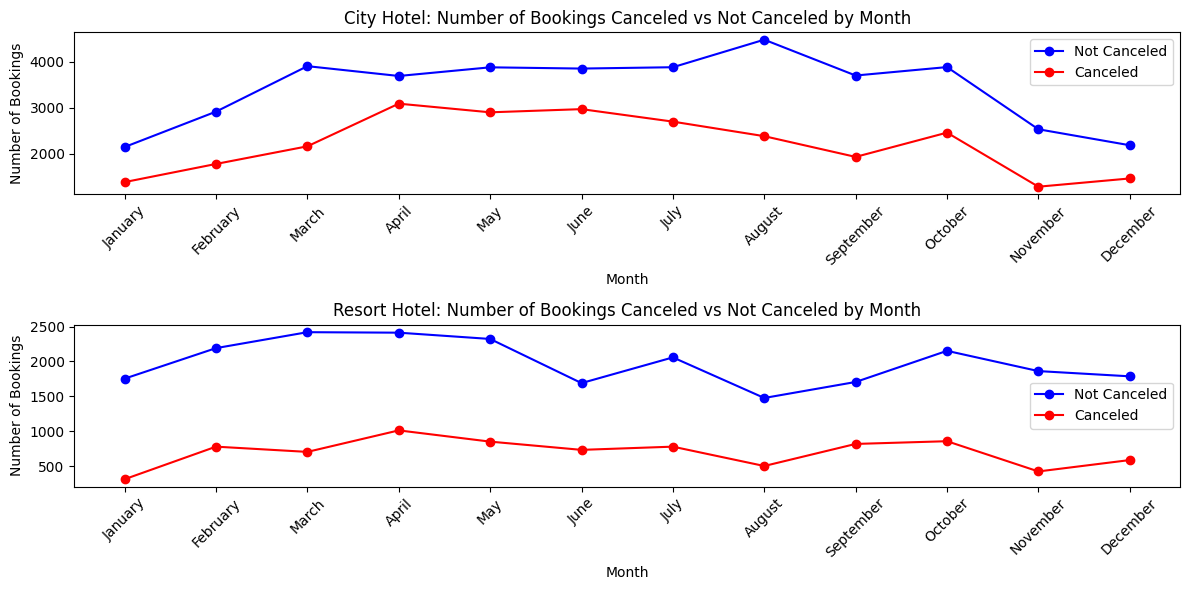

<Figure size 640x480 with 0 Axes>


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 2


    country  num_bookings  num_canceled  num_non_canceled
130     PRT         38660         20903             17757
55      GBR         10368          2064              8304
53      FRA          9427          1700              7727
49      ESP          7101          1647              5454
42      DEU          6090          1083              5007
77      ITA          3390          1191              2199
72      IRL          2969           663              2306
14      BEL          2125           415              1710
24      BRA          1974           708              1266
118     NLD          1941           345              1596


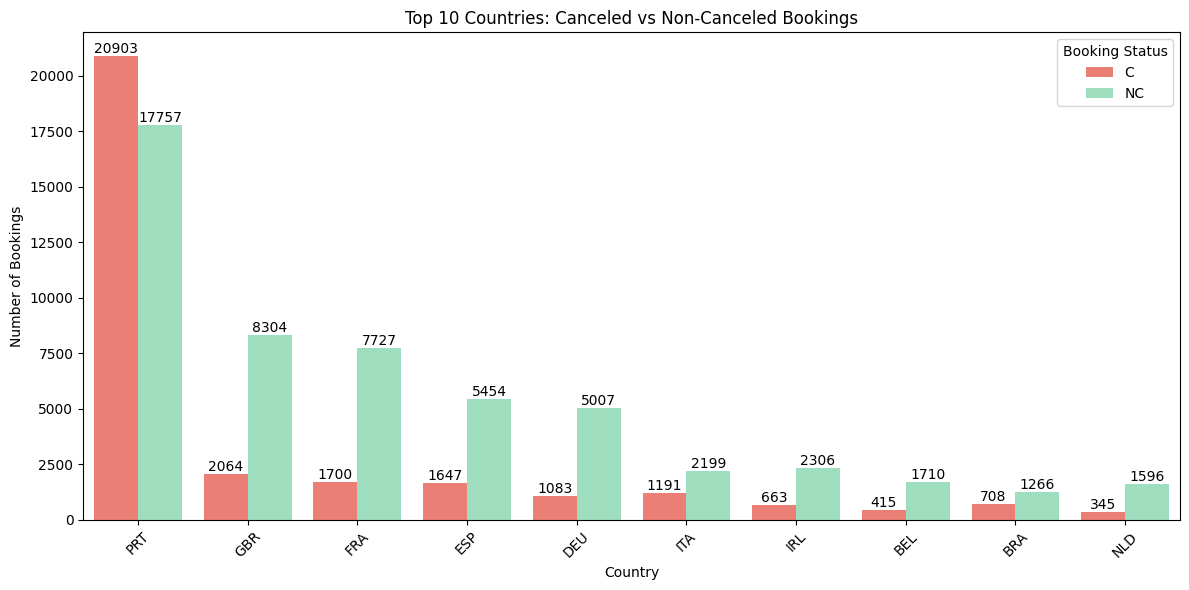


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 3


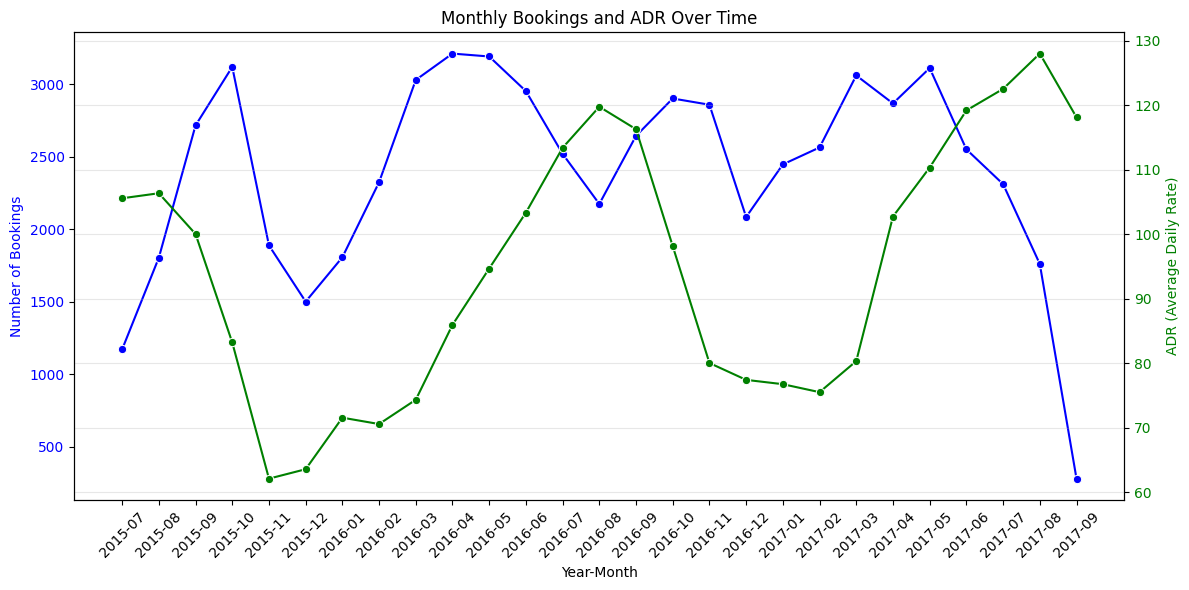

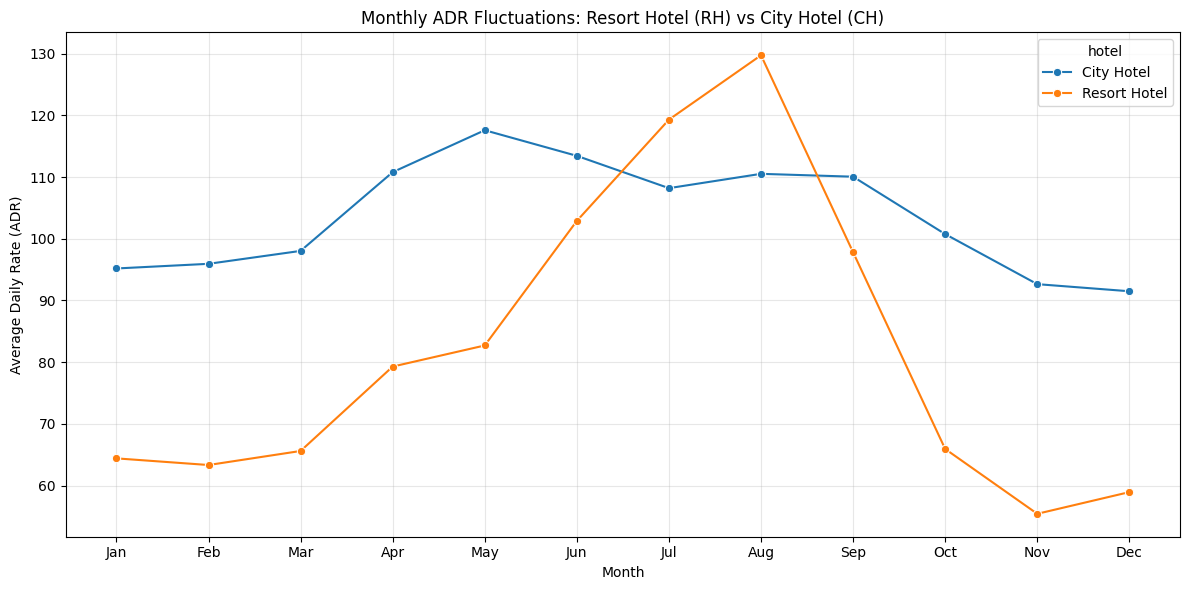


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 4


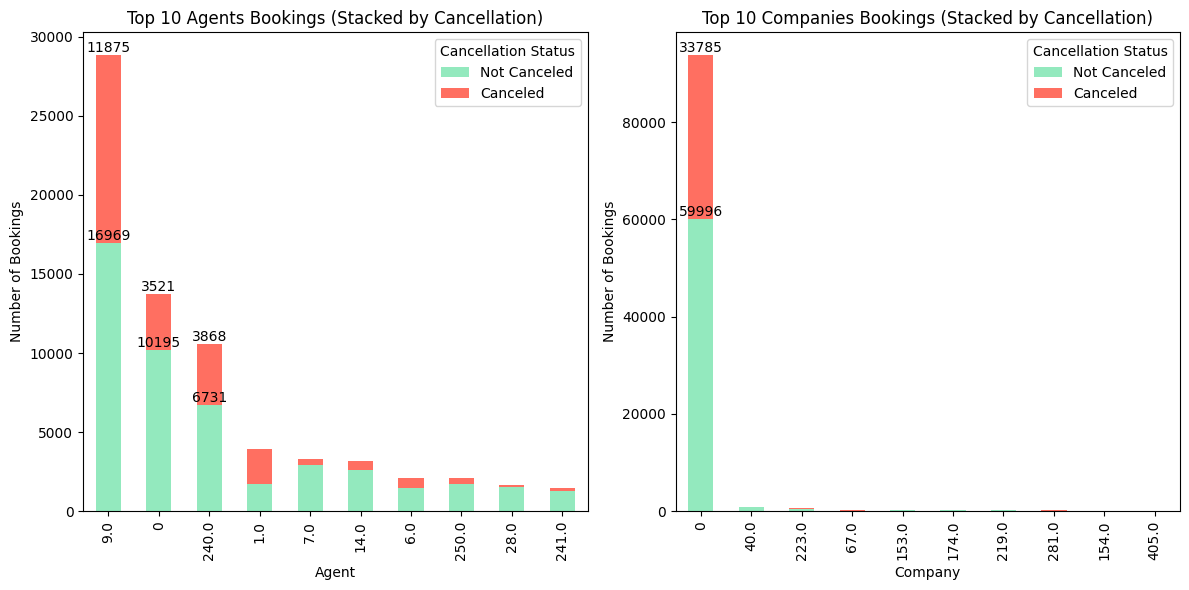


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 5


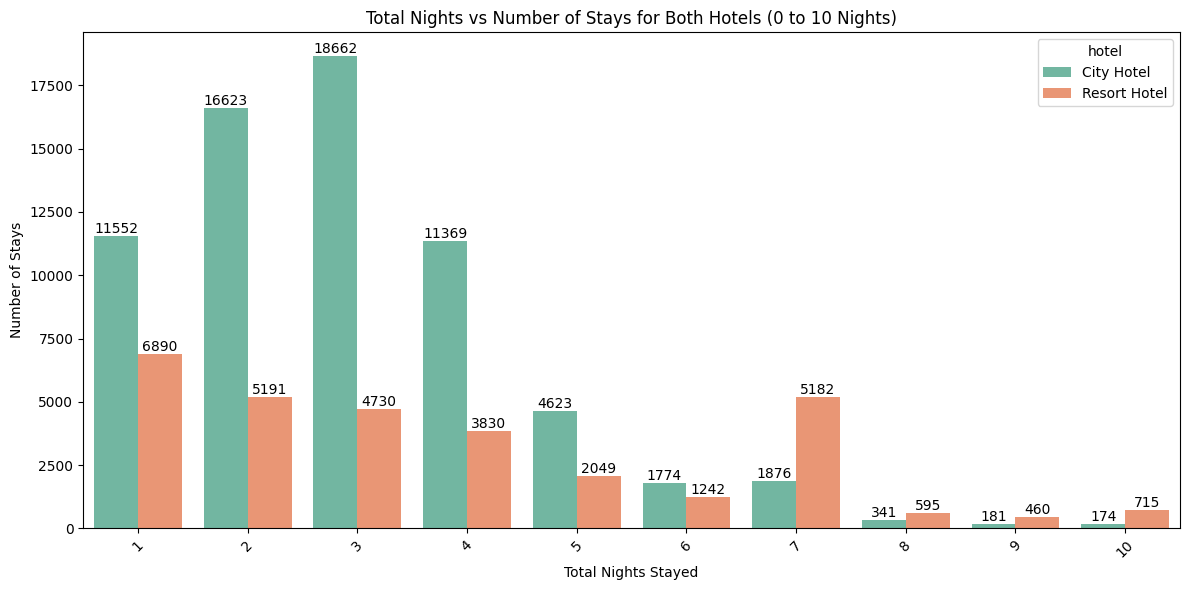


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 6


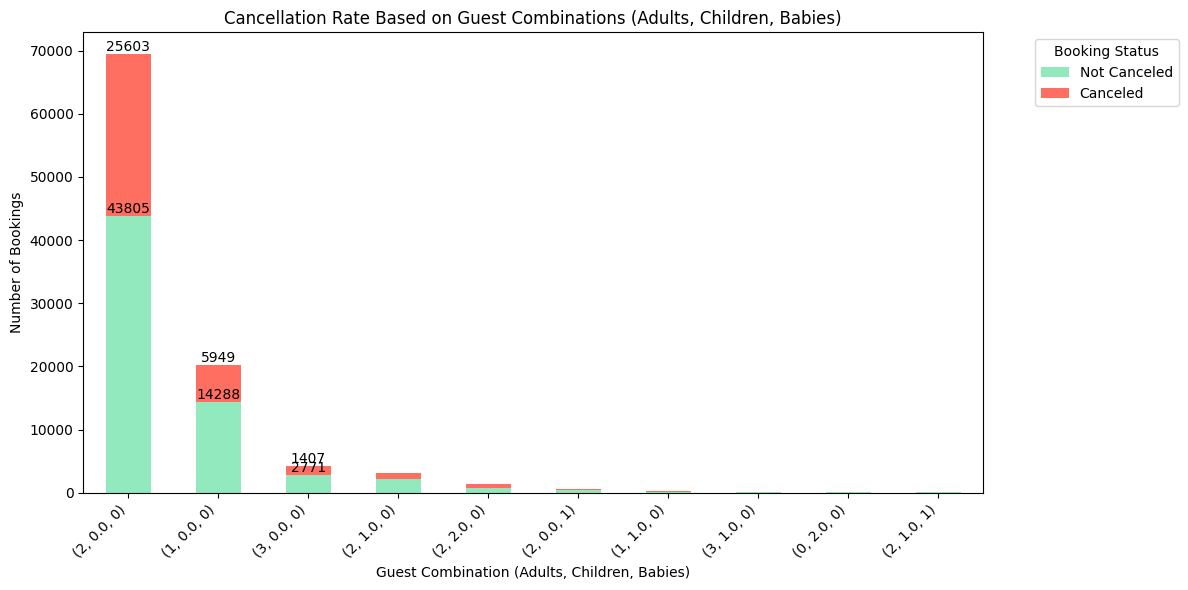


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 7


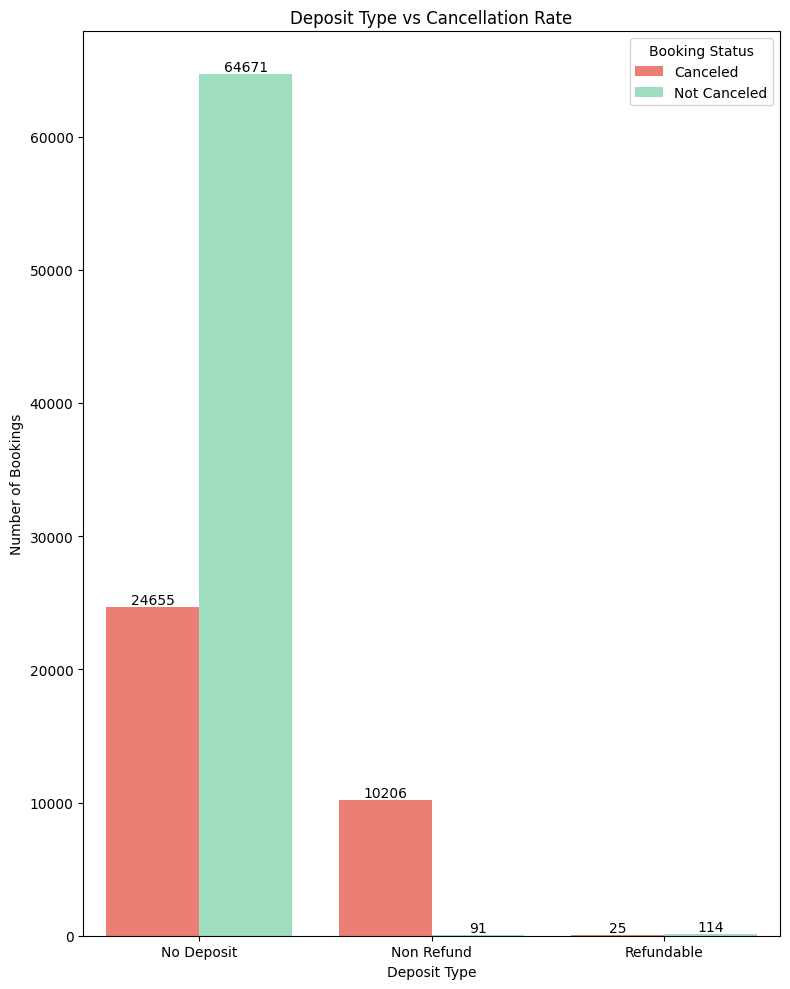


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 8


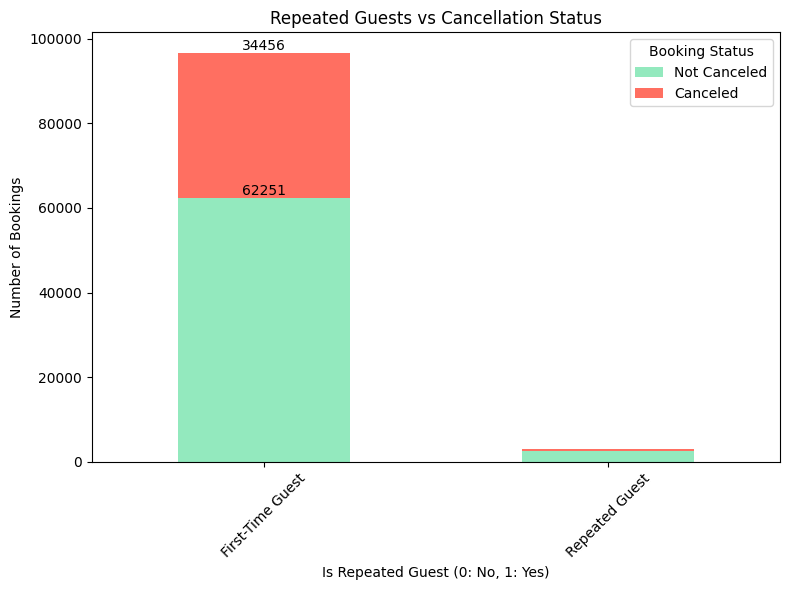


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 9


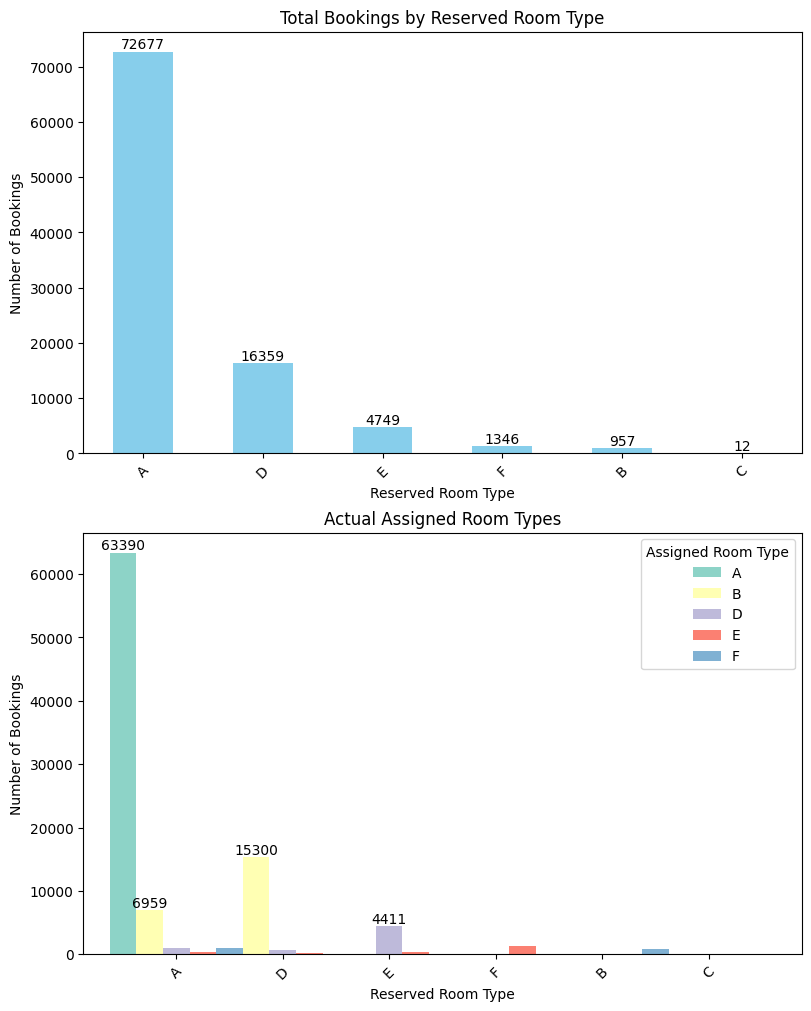

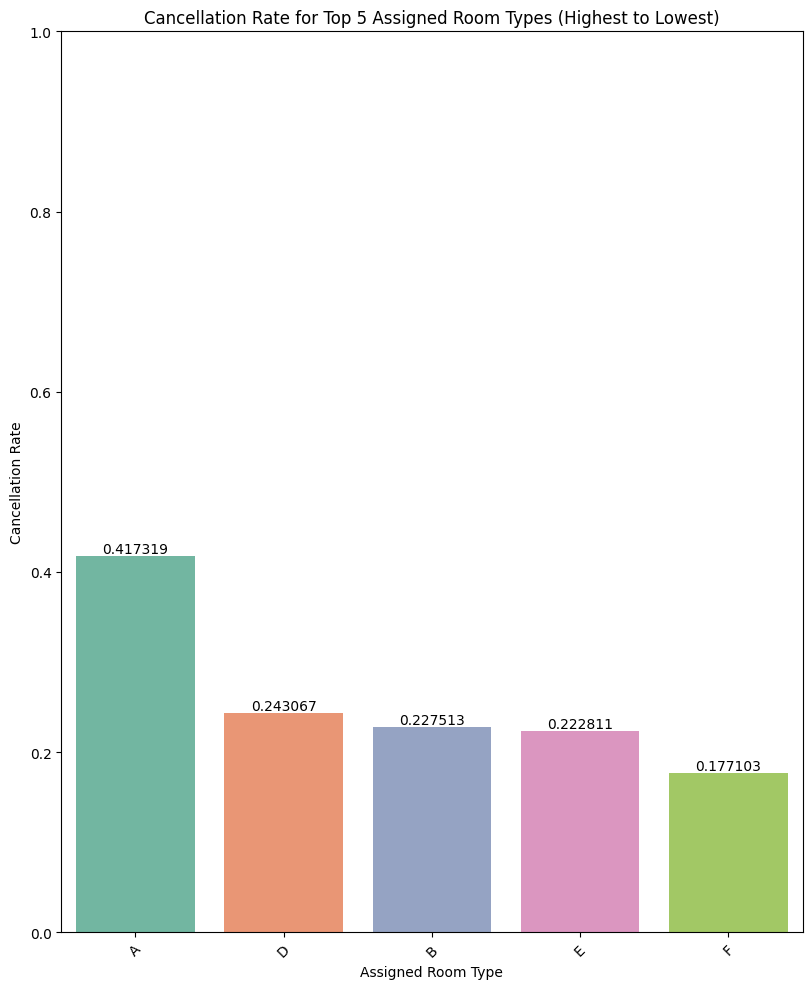


You have selected Business Problems and Visualizations Analysis
Enter 1 to view the Overall cancellation rate of all hotel bookings
Enter 2 to view the Customer base and its booking volume across different countries
Enter 3 to view the Seasonal trend and demand for hotel bookings
Enter 4 to view the Preferred Medium of Bookings
Enter 5 to view the Number of stays in different hotels
Enter 6 to view the Cancellation rate based on the guest combination
Enter 7 to view the Deposit type affecting cancellation rates
Enter 8 to view the Loyalty of Repeated guests vs First Time Guests
Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate 
Enter 0 to exit to main menu
Enter your category: 0
Returning to Main Menu...

Welcome to the Hotel Booking Analysis Visualization Menu!
Enter 1 for Data Exploration (EDA)
Enter 2 for Data Cleaning / Wrangling
Enter 3 for Data processing and Analysis
Enter 0 to end the menu.
Enter your Option: 0
Exiting the applica

In [ ]:
# Menu Function
def menu():
    print("\nWelcome to the Hotel Booking Analysis Visualization Menu!")
    print("Enter 1 for Data Exploration (EDA)")
    print("Enter 2 for Data Cleaning / Wrangling")
    print("Enter 3 for Data processing and Analysis")
    print("Enter 0 to end the menu.")

def submenu1():
    while True:
        print("\nYou have selected Data Exploration (EDA)")
        print("Enter 1 to display Summary of the dataset information")
        print("Enter 2 to Identify variable of missing values")
        print("Enter 3 to Explore categorical and numerical variable")
        print("Enter 4 to display the number of unique items")
        print("Enter 5 to display Correlation Matrix Heatmap")
        print("Enter 0 to exit to main menu")

        sub_option1 = int(input("Enter your category: "))
        if sub_option1 == 1:
            print("Displaying the first few rows of the DataFrame:")
            print(df.head())  # Displaying the first 5 rows
            print("\nInformation about the DataFrame:")
            df.info()  # df.info() already prints the output, so no need for print()
            print("\nDescriptive statistics of the DataFrame:")
            print(df.describe())  # Displaying summary statistics

        elif sub_option1 == 2:
            print("Displaying Missing Values")
            print(missing_values)
        elif sub_option1 == 3:
            print("Displaying Categorical Variables")
            categorical_columns()
            plot_top_n_categories(df_cleaned2, ["country", "agent", "company", "reservation_status_date"])
            print("Displaying Numerical Variables")
            plot_numerical_histograms(df_cleaned2)
        elif sub_option1 == 4:
            print("Displaying the number of unique items in each column:")
            print(df.nunique())
        elif sub_option1 == 5:
            print("Displaying Correlation Heatmap Matrix:")
            plot_correlation_heatmap(df_cleaned2)
        elif sub_option1 == 0:
            print("Returning to Main Menu...")
            break
        else:
            print("Invalid Option")

def submenu2():
    while True:
        print("\nYou have selected Data Cleaning / Wrangling")
        print("Enter 1 to display Replacing Null Values")
        print("Enter 2 to display Dropped Null Values")
        print("Enter 3 to display Outliers handling")
        print("Enter 0 to exit to main menu")

        sub_option2 = int(input("Enter your category: "))

        if sub_option2 == 1:
            print("Null values in children,agent and company rows are replaced by 0")
            print(df['children'])
            print(df_cleaned[['agent','company']])
        elif sub_option2 == 2:
            print("Data info after dropping values")
            print(df_cleaned.info())
        elif sub_option2 == 3:
            print("Displaying Outliers in the dataset of ADR and Lead Time")
            plot_boxplots(df_cleaned)
            print("Displaying After removal of outliers in dataset of ADR and Lead Time")
            display_boxplot2(df_cleaned2)
        elif sub_option2 == 0:
            print("Returning to Main Menu...")
            break
        else:
            print("Invalid Option")


def submenu3():
    while True:
        print("\nYou have selected Business Problems and Visualizations Analysis")
        print("Enter 1 to view the Overall cancellation rate of all hotel bookings")
        print("Enter 2 to view the Customer base and its booking volume across different countries")
        print("Enter 3 to view the Seasonal trend and demand for hotel bookings")
        print("Enter 4 to view the Preferred Medium of Bookings")
        print("Enter 5 to view the Number of stays in different hotels")
        print("Enter 6 to view the Cancellation rate based on the guest combination")
        print("Enter 7 to view the Deposit type affecting cancellation rates")
        print("Enter 8 to view the Loyalty of Repeated guests vs First Time Guests")
        print("Enter 9 to view the Reserved Room Type and Actual Assigned Room type with it's cancellation rate ")
        print("Enter 0 to exit to main menu")

        sub_option3 = int(input("Enter your category: "))

        if sub_option3 == 1:
            number_of_bookings_canceled_vs_not_canceled_by_month()
            City_and_Resort_hotel_number_of_bookings_canceled_vs_not_canceled_by_month()
        elif sub_option3 == 2:
            GeographicalBookingAreas()
            top10countries_canceled_vs_non_canceled()
        elif sub_option3 == 3:
            monthly_bookings_and_adr_over_time_line_chart()
            Monthly_ADR_Fluctuations_Resort_vs_City_Hotels()
        elif sub_option3 == 4:
            top_agents_and_companies()
        elif sub_option3 == 5:
            Total_Nights_vs_Number_of_Stays_for_Both_Hotels()
        elif sub_option3 == 6:
           Cancellation_Rate_Based_on_Guests_Combination()
        elif sub_option3 == 7:
           deposit_type_vs_cancellation_rate()
        elif sub_option3 == 8:
           Repeated_Guests_Vs_Cancellation_Status()
        elif sub_option3 == 9:
            Total_Bookings_By_Reserved_Room_Type()
            cancellation_rate_for_top_assigned_rooms()
        elif sub_option3 == 0:
            print("Returning to Main Menu...")
            break
        else:
            print("Invalid Option")

# Main Program Loop
menu()
option = int(input("Enter your Option: "))

while option != 0:
    if option == 1:
        submenu1()
    elif option == 2:
        submenu2()
    elif option == 3:
        submenu3()
    else:
        print("Invalid Option")

    menu()
    option = int(input("Enter your Option: "))

print("Exiting the application.")
